In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Analyses
from src.analyses.schedule_jobs_dataframe import jobs_metrics_from_operations_df, mean_start_deviation_per_shift_df

# Plots
from src.analyses.fig_experiment import make_combined_figure_startdeviation_tardiness_earliness

In [2]:
df_experiments = pd.read_csv("experiments_v01.csv")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type,max_utilization
0,B-1,0.25,1.00,0.75,0.1,1440,1,0,3,CP,0.75
1,B-2,0.25,0.75,0.75,0.1,1440,3,1,12,CP,0.75
2,B-3,0.25,0.50,0.75,0.1,1440,1,1,6,CP,0.75
3,B-4,0.25,0.25,0.75,0.1,1440,1,3,12,CP,0.75
4,B-5,0.25,0.00,0.75,0.1,1440,0,1,3,CP,0.75
...,...,...,...,...,...,...,...,...,...,...,...
175,R-125,1.00,1.00,0.95,0.3,1440,1,0,0,CP,0.95
176,R-126,1.00,0.75,0.95,0.3,1440,3,1,0,CP,0.95
177,R-127,1.00,0.50,0.95,0.3,1440,1,1,0,CP,0.95
178,R-128,1.00,0.25,0.95,0.3,1440,1,3,0,CP,0.95


In [3]:
df_schedules = pd.read_csv("schedules_v01.csv")
df_schedules

,Job,Routing_ID,Experiment_ID,Arrival,Ready Time,Due Date,Shift,Operation,Machine,Original Duration,Start,End,max_utilization
0,01-07500-0000,01-07,B-1,0,1440,3405,1,0,M02,31,2130,2161,0.75
1,01-07500-0000,01-07,B-2,0,1440,3405,1,0,M02,31,2133,2164,0.75
2,01-07500-0000,01-07,B-3,0,1440,3405,1,0,M02,31,1762,1793,0.75
3,01-07500-0000,01-07,B-4,0,1440,3405,1,0,M02,31,2150,2181,0.75
4,01-07500-0000,01-07,B-5,0,1440,3405,1,0,M02,31,1810,1841,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1014397,01-09500-0460,01-03,R-125,31544,31680,34164,22,9,M05,43,33513,33556,0.95
1014398,01-09500-0460,01-03,R-126,31544,31680,34164,22,9,M05,43,34121,34164,0.95
1014399,01-09500-0460,01-03,R-127,31544,31680,34164,22,9,M05,43,34121,34164,0.95
1014400,01-09500-0460,01-03,R-128,31544,31680,34164,22,9,M05,43,34121,34164,0.95


In [4]:
df_dev = pd.read_csv("experiment_shift_dev_v01.csv")
df_dev

,Experiment_ID,Shift,Deviation,Pairs
0,B-1,2,55.400000,20
1,B-1,3,85.100000,20
2,B-1,4,86.272727,55
3,B-1,5,33.097561,82
4,B-1,6,17.619048,21
...,...,...,...,...
3775,R-99,18,16.904762,42
3776,R-99,19,58.253165,79
3777,R-99,20,46.968750,32
3778,R-99,21,99.734694,98


In [5]:
df_metrics = jobs_metrics_from_operations_df(df_schedules)
df_metrics

,Job,Routing_ID,Experiment_ID,Shift,Arrival,Due Date,Completion,Tardiness,Earliness,Lateness
0,01-07500-0000,01-07,B-1,1,0,3405,3068,0,337,-337
1,01-07500-0001,01-06,B-1,1,60,2433,2374,0,59,-59
2,01-07500-0002,01-01,B-1,1,142,2766,2427,0,339,-339
3,01-07500-0003,01-05,B-1,1,197,2640,2262,0,378,-378
4,01-07500-0004,01-04,B-1,1,249,3581,3078,0,503,-503
...,...,...,...,...,...,...,...,...,...,...
74455,01-08500-0409,01-07,R-99,22,31539,33765,33942,177,0,177
74456,01-08500-0410,01-09,R-99,22,31589,33041,33622,581,0,581
74457,01-08500-0411,01-03,R-99,22,31599,33608,33608,0,0,0
74458,01-08500-0412,01-06,R-99,22,31620,33025,33712,687,0,687


In [6]:
def get_experiment_string(df, experiment_id):
    row = df[df["Experiment_ID"] == experiment_id].iloc[0]
    return (
        f"Experiment {experiment_id}\n"
        f"lateness/deviation = {row['Abs Lateness Ratio']:.2f}, "
        f"tardiness/earliness = {row['Inner Tardiness Ratio']:.2f}, "
        f"bottleneck utilization = {row['Max Bottleneck Utilization']:.2f} "
        f"(sigma = {row['Sim Sigma']:.2f})"
    )

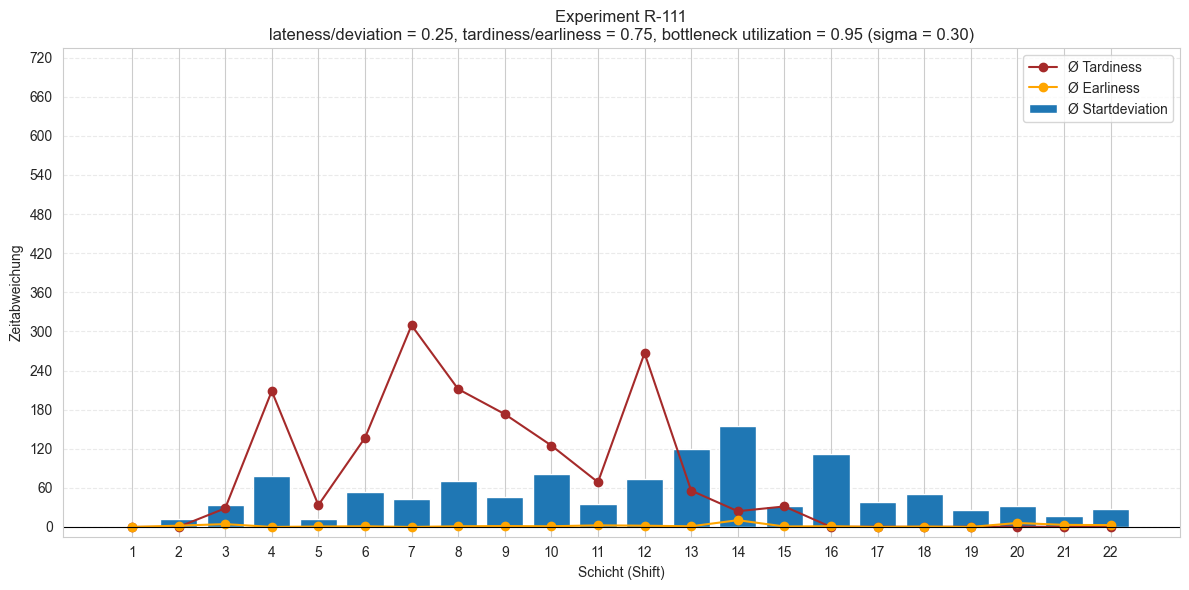

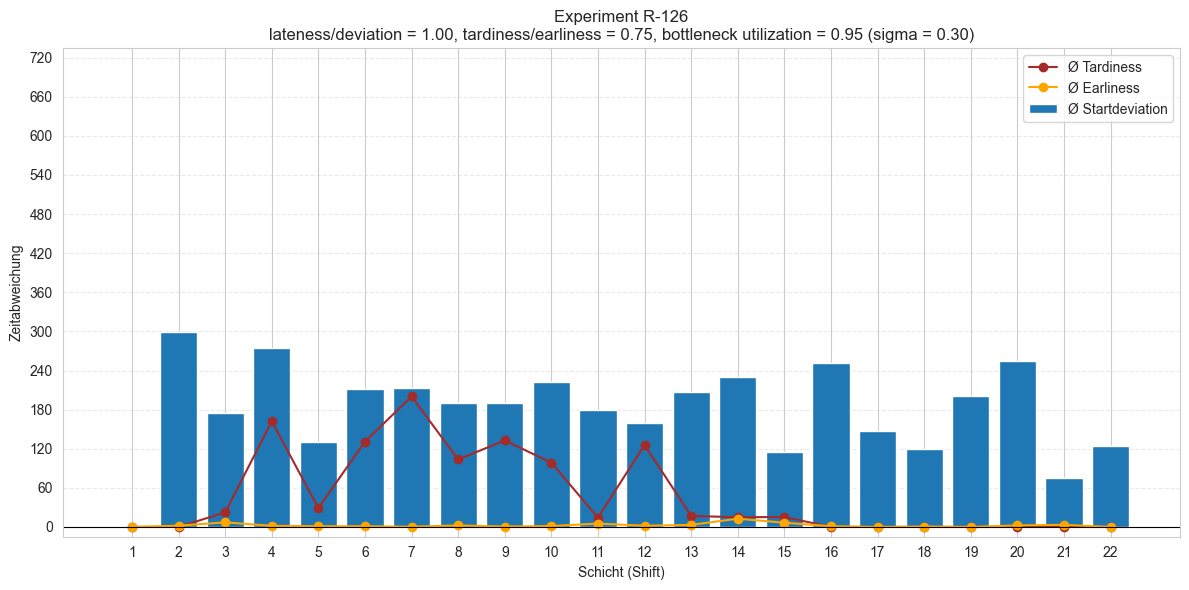

In [7]:
plt.show()
df_experiments_filtered = df_experiments[
    (df_experiments["Abs Lateness Ratio"].isin([0.25, 1])) &
    (df_experiments["Inner Tardiness Ratio"] == 0.75) &
    (df_experiments["Max Bottleneck Utilization"] == 0.95) &
    (df_experiments["Sim Sigma"].isin([0.3]))
    ]

experiment_ids = df_experiments_filtered["Experiment_ID"].tolist()

for experiment_id in experiment_ids:
    make_combined_figure_startdeviation_tardiness_earliness(
        df_dev=df_dev,
        df_metrics=df_metrics,
        experiment_id=experiment_id,
        y_step=60,
        y_max=720,
        title=f"{get_experiment_string(df_experiments, experiment_id)}"
    )
    plt.show()

### Kendall Tau

In [8]:
from src.utils.analysis.DataFrameEvaluation import get_kendall_tau_experiment_shift_df

df_kendall = get_kendall_tau_experiment_shift_df(
    df_schedules
)
df_kendall


,Experiment_ID,Shift,Kendall_Tau
0,B-1,2,0.733333
1,B-1,3,0.893334
2,B-1,4,0.806854
3,B-1,5,0.973989
4,B-1,6,1.000000
...,...,...,...
3775,R-99,18,0.992857
3776,R-99,19,0.887231
3777,R-99,20,0.963333
3778,R-99,21,0.837396


In [9]:
import matplotlib.pyplot as plt

def plot_kendall_tau_by_shift(df_kendall: pd.DataFrame, experiment_id: str):
    """
    Plottet Kendall's Tau über die Shifts für ein gegebenes Experiment_ID.
    """
    # Filtern und sortieren
    df_plot = df_kendall[df_kendall["Experiment_ID"] == experiment_id].copy()
    df_plot = df_plot.sort_values("Shift")

    plt.figure(figsize=(8, 4))
    plt.plot(df_plot["Shift"], df_plot["Kendall_Tau"], marker='o', linestyle='-', color='C0')
    plt.title(f"Kendall's Tau über Shifts – Experiment {experiment_id}")
    plt.xlabel("Shift")
    plt.ylabel("Kendall's Tau")
    plt.ylim(-1.05, 1.05)
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


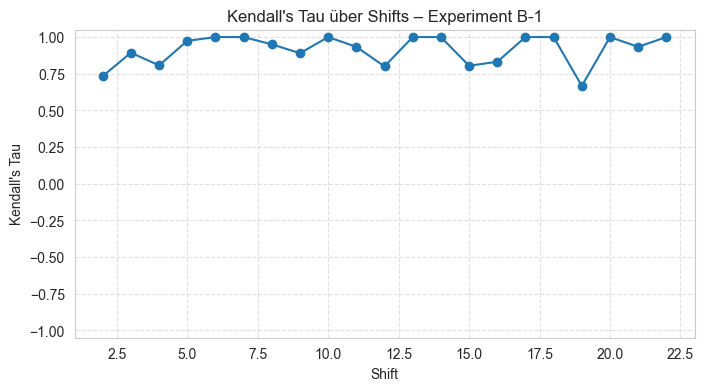

In [10]:
plot_kendall_tau_by_shift(df_kendall, experiment_id="B-1")


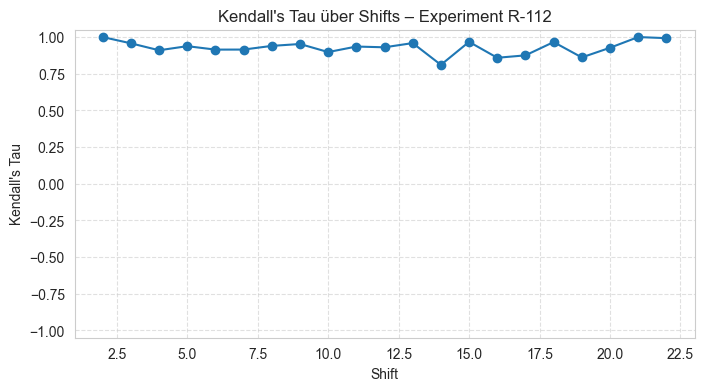

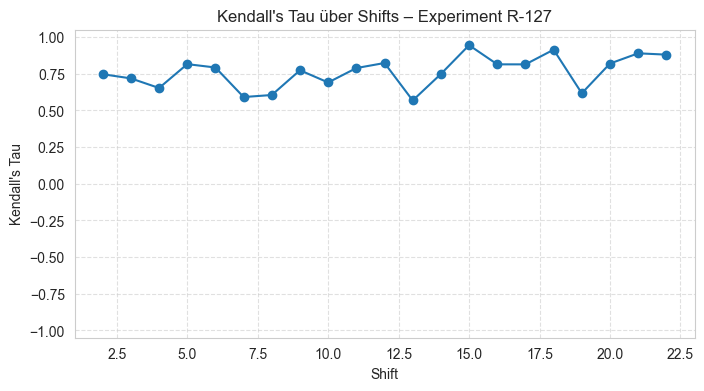

In [11]:
df_experiments_filtered = df_experiments[
    (df_experiments["Abs Lateness Ratio"].isin([0.25, 1])) &
    (df_experiments["Inner Tardiness Ratio"] == 0.5) &
    (df_experiments["Max Bottleneck Utilization"] == 0.95) &
    (df_experiments["Sim Sigma"].isin([0.3]))
    ]

experiment_ids = df_experiments_filtered["Experiment_ID"].tolist()

for experiment_id in experiment_ids:
    plot_kendall_tau_by_shift(df_kendall, experiment_id=experiment_id)

In [12]:
df_kendall_mean = (
    df_kendall
    .groupby("Experiment_ID", dropna=False)["Kendall_Tau"]
    .mean()
    .reset_index()
    .rename(columns={"Kendall_Tau": "Mean_Kendall_Tau"})
)
df_kendall_mean

,Experiment_ID,Mean_Kendall_Tau
0,B-1,0.915091
1,B-10,0.987609
2,B-11,0.914466
3,B-12,0.990585
4,B-13,0.956304
...,...,...
175,R-95,0.810127
176,R-96,0.889531
177,R-97,0.859063
178,R-98,0.892919


In [13]:
# 1️⃣ Mittelwert je Experiment berechnen
df_kendall_mean = (
    df_kendall
    .groupby("Experiment_ID", dropna=False)["Kendall_Tau"]
    .mean()
    .reset_index()
    .rename(columns={"Kendall_Tau": "Mean_Kendall_Tau"})
)

# 2️⃣ Mit df_experimente zusammenführen
df_experiments = df_experiments.merge(df_kendall_mean, on="Experiment_ID", how="left")

df_experiments


,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type,max_utilization,Mean_Kendall_Tau
0,B-1,0.25,1.00,0.75,0.1,1440,1,0,3,CP,0.75,0.915091
1,B-2,0.25,0.75,0.75,0.1,1440,3,1,12,CP,0.75,0.987228
2,B-3,0.25,0.50,0.75,0.1,1440,1,1,6,CP,0.75,0.971791
3,B-4,0.25,0.25,0.75,0.1,1440,1,3,12,CP,0.75,0.990386
4,B-5,0.25,0.00,0.75,0.1,1440,0,1,3,CP,0.75,0.977324
...,...,...,...,...,...,...,...,...,...,...,...,...
175,R-125,1.00,1.00,0.95,0.3,1440,1,0,0,CP,0.95,0.738511
176,R-126,1.00,0.75,0.95,0.3,1440,3,1,0,CP,0.95,0.771098
177,R-127,1.00,0.50,0.95,0.3,1440,1,1,0,CP,0.95,0.762085
178,R-128,1.00,0.25,0.95,0.3,1440,1,3,0,CP,0.95,0.728353


In [14]:
# Nur numerische Spalten auswählen
corr = df_experiments.select_dtypes(include="number").corr()

# Fokus auf Kendall Tau
kendall_corr = corr["Mean_Kendall_Tau"].sort_values(ascending=False)
display(kendall_corr)


Mean_Kendall_Tau              1.000000
w_dev                         0.423570
w_e                           0.224120
w_t                           0.149519
Max Bottleneck Utilization   -0.050037
max_utilization              -0.050037
Inner Tardiness Ratio        -0.077834
Sim Sigma                    -0.418925
Abs Lateness Ratio           -0.582352
Shift Length                       NaN
Name: Mean_Kendall_Tau, dtype: float64

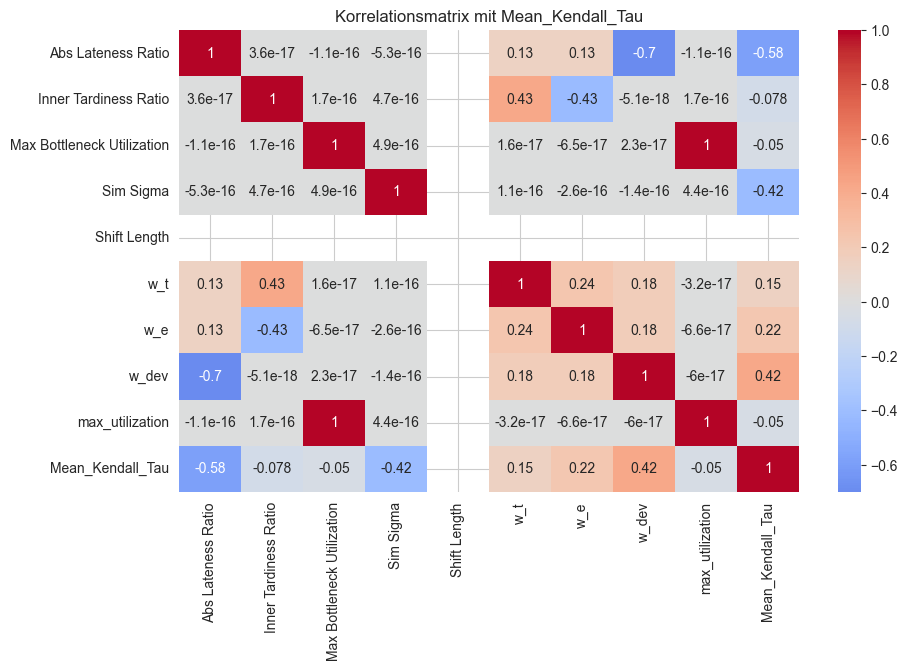

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Korrelationsmatrix mit Mean_Kendall_Tau")
plt.show()


In [16]:
df_grouped = (
    df_experiments
    .groupby(["Abs Lateness Ratio", "Inner Tardiness Ratio", "Max Bottleneck Utilization"], as_index=False)
    ["Mean_Kendall_Tau"].mean()
)
display(df_grouped.head())


,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Mean_Kendall_Tau
0,0.25,0.00,0.75,0.942822
1,0.25,0.00,0.85,0.938236
2,0.25,0.00,0.95,0.959290
3,0.25,0.25,0.75,0.937540
4,0.25,0.25,0.85,0.927058


In [17]:
import plotly.express as px
fig = px.scatter_3d(
    df_experiments,
    x="Abs Lateness Ratio",
    y="Inner Tardiness Ratio",
    z="Mean_Kendall_Tau",
    color="Max Bottleneck Utilization",
    symbol="Experiment_Type",
    size="w_dev",
    title="Planstabilität in Abhängigkeit von Lateness, Tardiness und Bottleneck"
)

filename = f"kendall_tau_3d.html"

# Speichern
fig.write_html(filename, include_plotlyjs="cdn")

fig.show()


In [18]:
import plotly.express as px

fig = px.scatter_3d(
    df_experiments,
    x="Abs Lateness Ratio",
    y="Inner Tardiness Ratio",
    z="Mean_Kendall_Tau",
    color="Max Bottleneck Utilization",
    size="Sim Sigma",  # optional – zeigt Streuung oder Unsicherheit
    title="Planstabilität in Abhängigkeit von Lateness, Tardiness, Bottleneck und Sigma",
    template="plotly_white"
)

fig.update_layout(
    scene=dict(
        xaxis_title="Abs Lateness Ratio",
        yaxis_title="Inner Tardiness Ratio",
        zaxis_title="Mean Kendall’s Tau"
    ),
    legend_title_text="Max Bottleneck Utilization",
)

fig.show()


In [19]:
import plotly.express as px

fig = px.scatter_3d(
    df_experiments,
    x="Abs Lateness Ratio",
    y="Inner Tardiness Ratio",
    z="Mean_Kendall_Tau",  # <-- Zielwert!
    color="Max Bottleneck Utilization",
    size="Sim Sigma",
    title="Zielwert: Mean Kendall’s Tau in Abhängigkeit der Parameter",
    template="plotly_white"
)

fig.update_layout(
    scene=dict(
        xaxis_title="Abs Lateness Ratio",
        yaxis_title="Inner Tardiness Ratio",
        zaxis_title="Mean Kendall’s Tau"
    ),
    legend_title_text="Max Bottleneck Utilization",
)
fig.show()


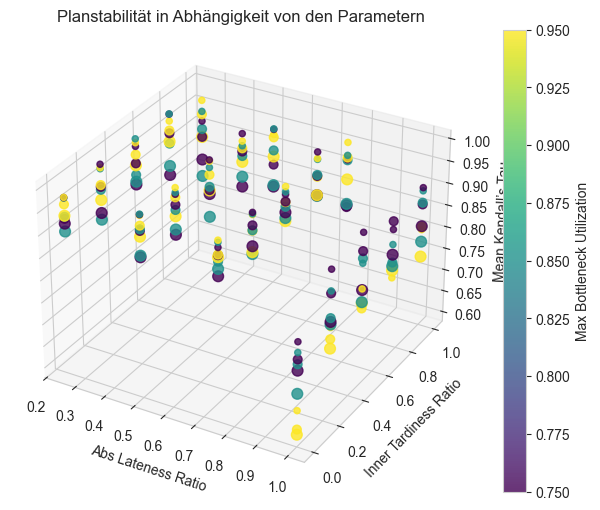

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")

sc = ax.scatter(
    df_experiments["Abs Lateness Ratio"],
    df_experiments["Inner Tardiness Ratio"],
    df_experiments["Mean_Kendall_Tau"],
    c=df_experiments["Max Bottleneck Utilization"],
    s=df_experiments["Sim Sigma"] * 200,
    cmap="viridis",
    alpha=0.8
)

ax.set_xlabel("Abs Lateness Ratio")
ax.set_ylabel("Inner Tardiness Ratio")
ax.set_zlabel("Mean Kendall’s Tau")
ax.set_title("Planstabilität in Abhängigkeit von den Parametern")

fig.colorbar(sc, ax=ax, label="Max Bottleneck Utilization")
plt.show()


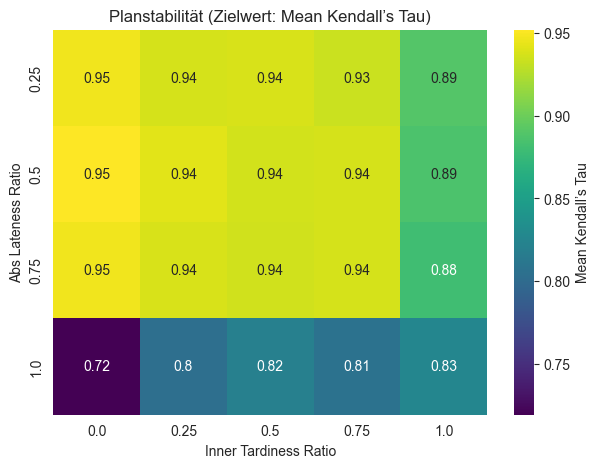

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
pivot = df_experiments.pivot_table(
    index="Abs Lateness Ratio",
    columns="Inner Tardiness Ratio",
    values="Mean_Kendall_Tau",
    aggfunc="mean"
)

sns.heatmap(pivot, annot=True, cmap="viridis", cbar_kws={'label': 'Mean Kendall’s Tau'})
plt.title("Planstabilität (Zielwert: Mean Kendall’s Tau)")
plt.xlabel("Inner Tardiness Ratio")
plt.ylabel("Abs Lateness Ratio")
plt.show()


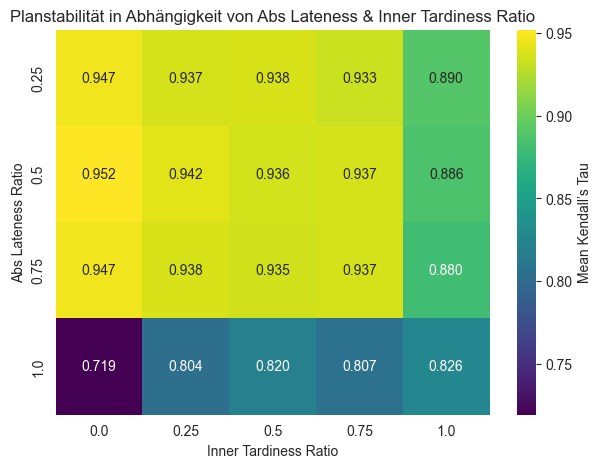

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))

# Pivot-Tabelle für Heatmap
pivot = df_experiments.pivot_table(
    index="Abs Lateness Ratio",
    columns="Inner Tardiness Ratio",
    values="Mean_Kendall_Tau",
    aggfunc="mean"
)

sns.heatmap(
    pivot,
    annot=True,
    cmap="viridis",
    cbar_kws={'label': 'Mean Kendall’s Tau'},
    fmt=".3f"
)

plt.title("Planstabilität in Abhängigkeit von Abs Lateness & Inner Tardiness Ratio")
plt.xlabel("Inner Tardiness Ratio")
plt.ylabel("Abs Lateness Ratio")
plt.show()


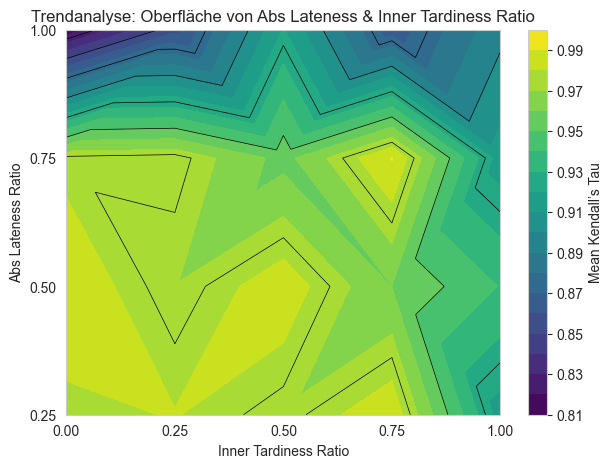

In [23]:
import matplotlib.tri as tri

x = df_experiments["Inner Tardiness Ratio"]
y = df_experiments["Abs Lateness Ratio"]
z = df_experiments["Mean_Kendall_Tau"]

plt.figure(figsize=(7,5))
tcf = plt.tricontourf(x, y, z, cmap="viridis", levels=20)
plt.tricontour(x, y, z, colors="k", linewidths=0.5)
plt.colorbar(tcf, label="Mean Kendall’s Tau")

plt.title("Trendanalyse: Oberfläche von Abs Lateness & Inner Tardiness Ratio")
plt.xlabel("Inner Tardiness Ratio")
plt.ylabel("Abs Lateness Ratio")
plt.xticks(sorted(df_experiments["Inner Tardiness Ratio"].unique()))
plt.yticks(sorted(df_experiments["Abs Lateness Ratio"].unique()))
plt.show()



C:\Users\konra\AppData\Local\Temp\ipykernel_2108\3820966825.py:26: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



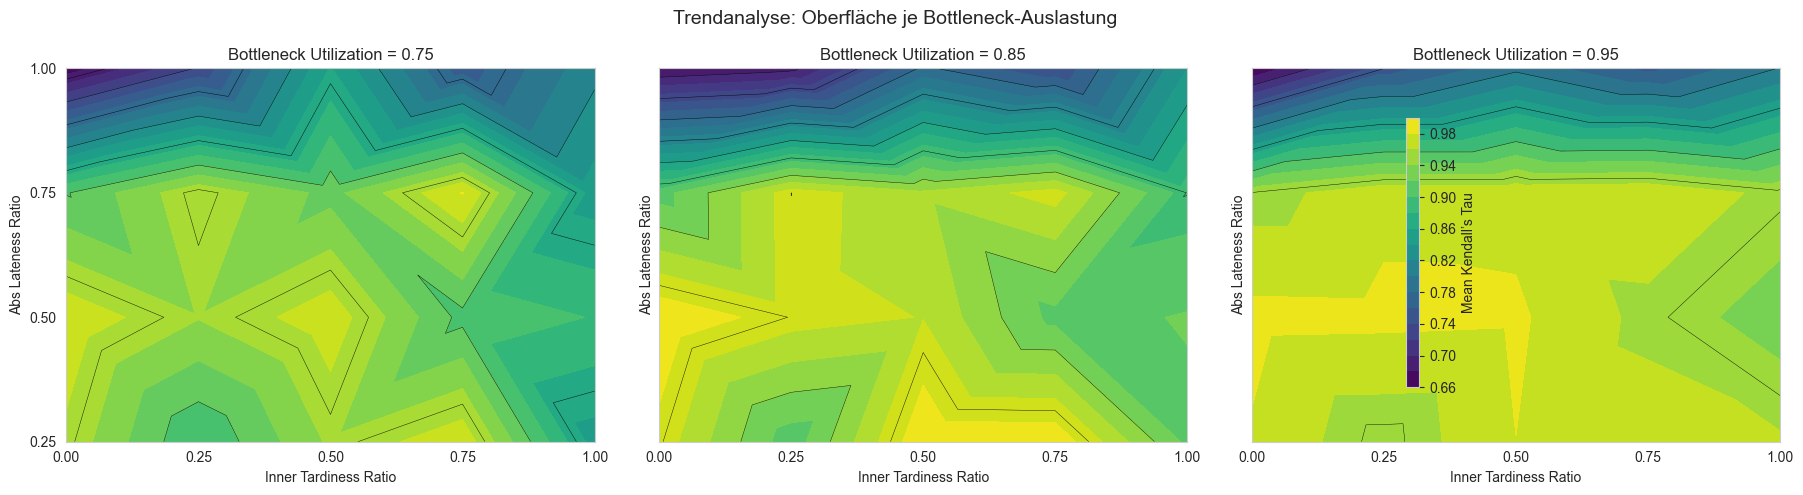

In [24]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

unique_bottlenecks = sorted(df_experiments["Max Bottleneck Utilization"].unique())
n = len(unique_bottlenecks)

fig, axes = plt.subplots(1, n, figsize=(6*n, 5), sharey=True)

for ax, bval in zip(axes, unique_bottlenecks):
    subset = df_experiments[df_experiments["Max Bottleneck Utilization"] == bval]
    x = subset["Inner Tardiness Ratio"]
    y = subset["Abs Lateness Ratio"]
    z = subset["Mean_Kendall_Tau"]

    tcf = ax.tricontourf(x, y, z, cmap="viridis", levels=20)
    ax.tricontour(x, y, z, colors="k", linewidths=0.3)
    ax.set_title(f"Bottleneck Utilization = {bval}")
    ax.set_xlabel("Inner Tardiness Ratio")
    ax.set_ylabel("Abs Lateness Ratio")
    ax.set_xticks(sorted(df_experiments["Inner Tardiness Ratio"].unique()))
    ax.set_yticks(sorted(df_experiments["Abs Lateness Ratio"].unique()))

fig.colorbar(tcf, ax=axes, orientation="vertical", shrink=0.7, label="Mean Kendall’s Tau")
fig.suptitle("Trendanalyse: Oberfläche je Bottleneck-Auslastung", fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\konra\AppData\Local\Temp\ipykernel_2108\364620483.py:54: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



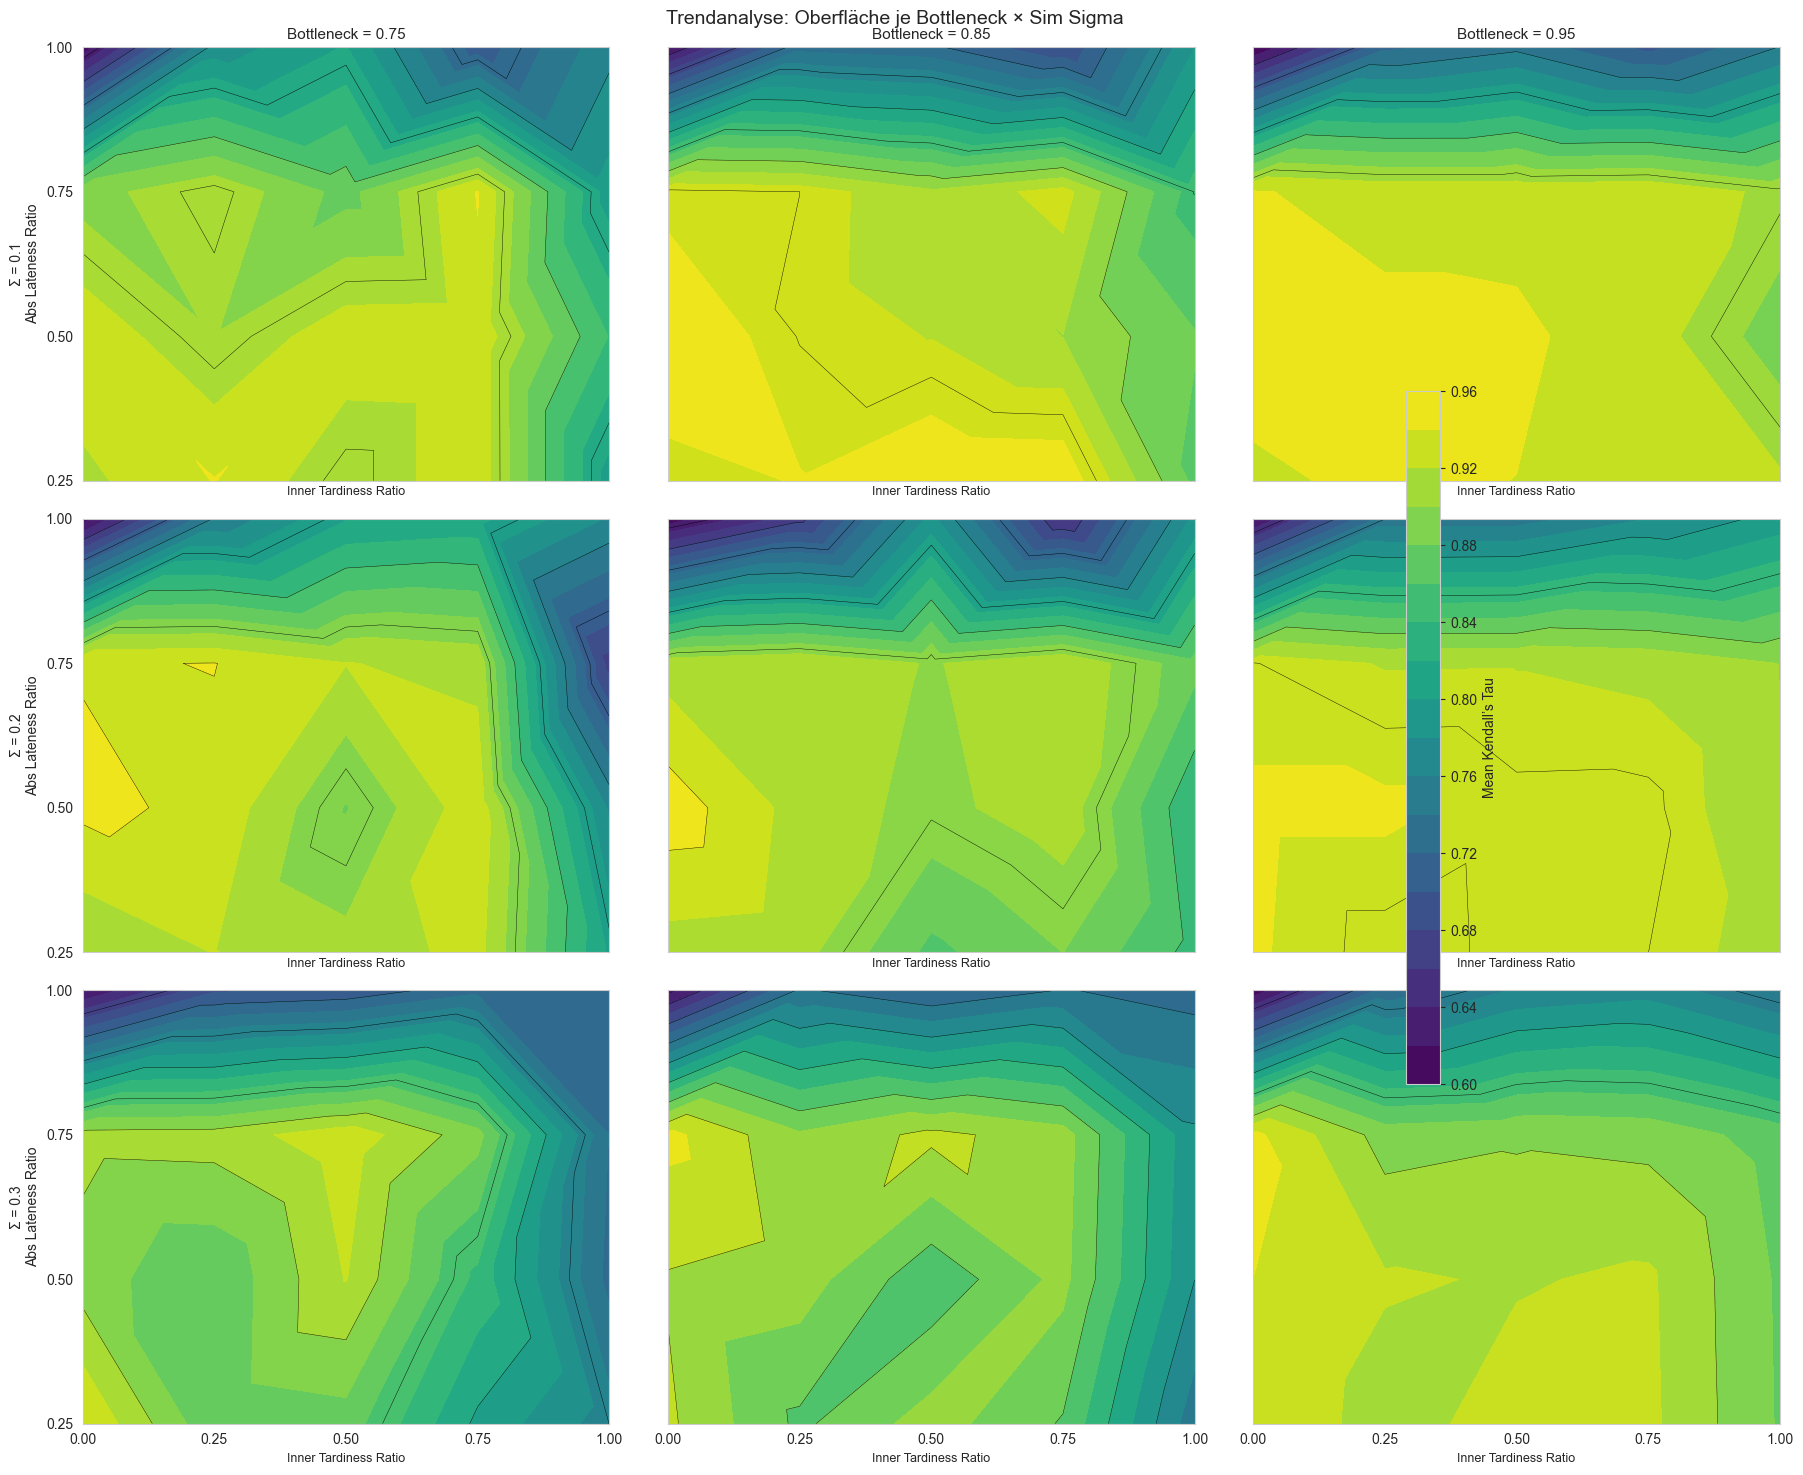

In [25]:
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

# Alle einzigartigen Kombinationen bestimmen
unique_bottlenecks = sorted(df_experiments["Max Bottleneck Utilization"].unique())
unique_sigmas = sorted(df_experiments["Sim Sigma"].unique())

n_cols = len(unique_bottlenecks)
n_rows = len(unique_sigmas)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(6*n_cols, 5*n_rows),
    sharey=True, sharex=True
)

# Falls nur eine Zeile oder Spalte, in 2D-Array umwandeln
if n_rows == 1:
    axes = np.expand_dims(axes, axis=0)
if n_cols == 1:
    axes = np.expand_dims(axes, axis=1)

# Plot pro (sigma, bottleneck)
for i, sigma in enumerate(unique_sigmas):
    for j, bottleneck in enumerate(unique_bottlenecks):
        ax = axes[i, j]
        subset = df_experiments[
            (df_experiments["Max Bottleneck Utilization"] == bottleneck) &
            (df_experiments["Sim Sigma"] == sigma)
        ]
        if subset.empty:
            ax.set_visible(False)
            continue

        x = subset["Inner Tardiness Ratio"]
        y = subset["Abs Lateness Ratio"]
        z = subset["Mean_Kendall_Tau"]

        tcf = ax.tricontourf(x, y, z, cmap="viridis", levels=20)
        ax.tricontour(x, y, z, colors="k", linewidths=0.3)

        if i == 0:
            ax.set_title(f"Bottleneck = {bottleneck}", fontsize=11)
        if j == 0:
            ax.set_ylabel(f"Σ = {sigma}\nAbs Lateness Ratio", fontsize=10)
        ax.set_xlabel("Inner Tardiness Ratio", fontsize=9)
        ax.set_xticks(sorted(df_experiments["Inner Tardiness Ratio"].unique()))
        ax.set_yticks(sorted(df_experiments["Abs Lateness Ratio"].unique()))

# Gemeinsame Farbskala
cbar = fig.colorbar(tcf, ax=axes, orientation="vertical", shrink=0.6, label="Mean Kendall’s Tau")
fig.suptitle("Trendanalyse: Oberfläche je Bottleneck × Sim Sigma", fontsize=14)
plt.tight_layout()
plt.show()


In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from scipy.interpolate import griddata
from typing import Tuple, Optional

def plot_tau_surface_matrix(
    df,
    *,
    value_col: str = "Mean_Kendall_Tau",
    x_col: str = "Inner Tardiness Ratio",
    y_col: str = "Abs Lateness Ratio",
    col_col: str = "Max Bottleneck Utilization",
    row_col: str = "Sim Sigma",
    cmap_name: str = "RdYlGn",   # ✅ hoch = gut → grün bei hohen Werten
    n_levels: int = 12,
    vmin: Optional[float] = 0.0,  # sinnvolle Defaults für Tau
    vmax: Optional[float] = 1.0,
    grid_n: int = 140,
    figsize_scale: Tuple[float, float] = (6, 5),
    extend: Optional[str] = None  # z.B. "min" wenn du unten einen Pfeil willst
) -> Tuple[plt.Figure, np.ndarray]:
    unique_cols = sorted(df[col_col].unique())
    unique_rows = sorted(df[row_col].unique())
    n_cols, n_rows = len(unique_cols), len(unique_rows)

    z_all = df[value_col].to_numpy()
    if vmin is None:
        vmin = float(np.nanmin(z_all))
    if vmax is None:
        vmax = float(np.nanmax(z_all))

    cmap = mpl.colormaps.get_cmap(cmap_name)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    levels = np.linspace(vmin, vmax, n_levels)

    xticks_vals = sorted(np.unique(df[x_col]))
    yticks_vals = sorted(np.unique(df[y_col]))

    Xi = np.linspace(min(xticks_vals), max(xticks_vals), grid_n)
    Yi = np.linspace(min(yticks_vals), max(yticks_vals), grid_n)
    Xg, Yg = np.meshgrid(Xi, Yi)

    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(figsize_scale[0]*n_cols, figsize_scale[1]*n_rows),
        sharex=True, sharey=True, constrained_layout=True
    )
    axes = np.atleast_2d(axes)

    for i, row_val in enumerate(unique_rows):
        for j, col_val in enumerate(unique_cols):
            ax = axes[i, j]
            sub = df[(df[col_col] == col_val) & (df[row_col] == row_val)]
            if sub.empty or sub[[x_col, y_col]].dropna().shape[0] < 3:
                ax.set_visible(False)
                continue

            x = sub[x_col].to_numpy()
            y = sub[y_col].to_numpy()
            z = np.clip(sub[value_col].to_numpy(), vmin, vmax)

            Z_lin  = griddata((x, y), z, (Xg, Yg), method="cubic")
            Z_near = griddata((x, y), z, (Xg, Yg), method="nearest")
            Z_fill = np.where(np.isnan(Z_lin), Z_near, Z_lin)
            Z_fill = np.clip(Z_fill, vmin, vmax)

            ax.contourf(Xg, Yg, Z_fill, levels=levels, cmap=cmap, norm=norm)
            ax.contour (Xg, Yg, Z_fill, levels=levels, colors="k", linewidths=0.3)

            if i == 0:
                ax.set_title(f"{col_col} = {col_val}", fontsize=11)
            if j == 0:
                ax.set_ylabel(f"{row_col} = {row_val}\n{y_col}", fontsize=10)
            ax.set_xlabel(x_col, fontsize=9)
            ax.set_xticks(xticks_vals)
            ax.set_yticks(yticks_vals)

    sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap); sm.set_array([])
    cbar = fig.colorbar(
        sm, ax=axes.ravel().tolist(),
        orientation="vertical", fraction=0.04, pad=0.02,
        label=value_col,
        extend=extend   # z.B. "min" wenn Werte < vmin existieren; sonst None
    )
    ticks = np.linspace(vmin, vmax, 6)
    cbar.set_ticks(ticks)
    cbar.ax.set_yticklabels([f"{t:.2f}" for t in ticks])

    fig.suptitle(
        f"Trendanalyse (Kendall τ): je {col_col} × {row_col} – hohe Werte = gut",
        fontsize=14
    )
    return fig, axes


In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from scipy.interpolate import griddata
from typing import Tuple, Optional

def plot_tau_surface_matrix(
    df,
    *,
    value_col: str = "Mean_Kendall_Tau",
    x_col: str = "Inner Tardiness Ratio",
    y_col: str = "Abs Lateness Ratio",
    col_col: str = "Max Bottleneck Utilization",
    row_col: str = "Sim Sigma",
    cmap_name: str = "RdYlGn",        # hoch = gut -> grün oben
    n_levels: int = 12,
    vmin: Optional[float] = 0.0,       # sinnvolle Defaults für τ
    vmax: Optional[float] = 1.0,
    grid_n: int = 140,
    figsize_scale: Tuple[float, float] = (6, 5),
) -> Tuple[plt.Figure, np.ndarray]:
    # Facettendimensionen
    unique_cols = sorted(df[col_col].unique())
    unique_rows = sorted(df[row_col].unique())
    n_cols, n_rows = len(unique_cols), len(unique_rows)

    # Datenbereich (für extend-Erkennung)
    z_all = df[value_col].to_numpy(dtype=float)
    data_min = float(np.nanmin(z_all))
    data_max = float(np.nanmax(z_all))
    if vmin is None: vmin = data_min
    if vmax is None: vmax = data_max

    # Colormap & Norm (Clipping aktiv)
    cmap = mpl.colormaps.get_cmap(cmap_name)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    levels = np.linspace(vmin, vmax, n_levels)

    # Achsenticks (nur echte Stufen)
    xticks_vals = sorted(np.unique(df[x_col]))
    yticks_vals = sorted(np.unique(df[y_col]))

    # Gemeinsames Interpolationsgitter
    Xi = np.linspace(min(xticks_vals), max(xticks_vals), grid_n)
    Yi = np.linspace(min(yticks_vals), max(yticks_vals), grid_n)
    Xg, Yg = np.meshgrid(Xi, Yi)

    # Figure/Axes
    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(figsize_scale[0]*n_cols, figsize_scale[1]*n_rows),
        sharex=True, sharey=True,
        constrained_layout=True
    )
    axes = np.atleast_2d(axes)

    # Facetten zeichnen
    for i, row_val in enumerate(unique_rows):
        for j, col_val in enumerate(unique_cols):
            ax = axes[i, j]
            sub = df[(df[col_col] == col_val) & (df[row_col] == row_val)]
            if sub.empty or sub[[x_col, y_col]].dropna().shape[0] < 3:
                ax.set_visible(False)
                continue

            x = sub[x_col].to_numpy(dtype=float)
            y = sub[y_col].to_numpy(dtype=float)
            z = sub[value_col].to_numpy(dtype=float)
            z = np.clip(z, vmin, vmax)  # hartes Clipping -> keine „weißen“ Bereiche

            Z_lin  = griddata((x, y), z, (Xg, Yg), method="cubic")
            Z_near = griddata((x, y), z, (Xg, Yg), method="nearest")
            Z_fill = np.where(np.isnan(Z_lin), Z_near, Z_lin)
            Z_fill = np.clip(Z_fill, vmin, vmax)

            ax.contourf(Xg, Yg, Z_fill, levels=levels, cmap=cmap, norm=norm)
            ax.contour (Xg, Yg, Z_fill, levels=levels, colors="k", linewidths=0.3)

            if i == 0:
                ax.set_title(f"{col_col} = {col_val}", fontsize=11)
            if j == 0:
                ax.set_ylabel(f"{row_col} = {row_val}\n{y_col}", fontsize=10)
            ax.set_xlabel(x_col, fontsize=9)
            ax.set_xticks(xticks_vals)
            ax.set_yticks(yticks_vals)

    # Colorbar – extend automatisch (unten/oben/both), je nach Daten vs. vmin/vmax
    extend = None
    if data_min < vmin and data_max > vmax:
        extend = "both"
    elif data_min < vmin:
        extend = "min"
    elif data_max > vmax:
        extend = "max"

    sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap); sm.set_array([])
    cbar = fig.colorbar(
        sm, ax=axes.ravel().tolist(),
        orientation="vertical", fraction=0.04, pad=0.02,
        label=value_col, extend=extend
    )
    ticks = np.linspace(vmin, vmax, 6)
    cbar.set_ticks(ticks)
    cbar.ax.set_yticklabels([f"{t:.2f}" for t in ticks])

    fig.suptitle(
        f"Trendanalyse (Kendall τ): je {col_col} × {row_col} – höhere Werte = besser",
        fontsize=14
    )
    return fig, axes


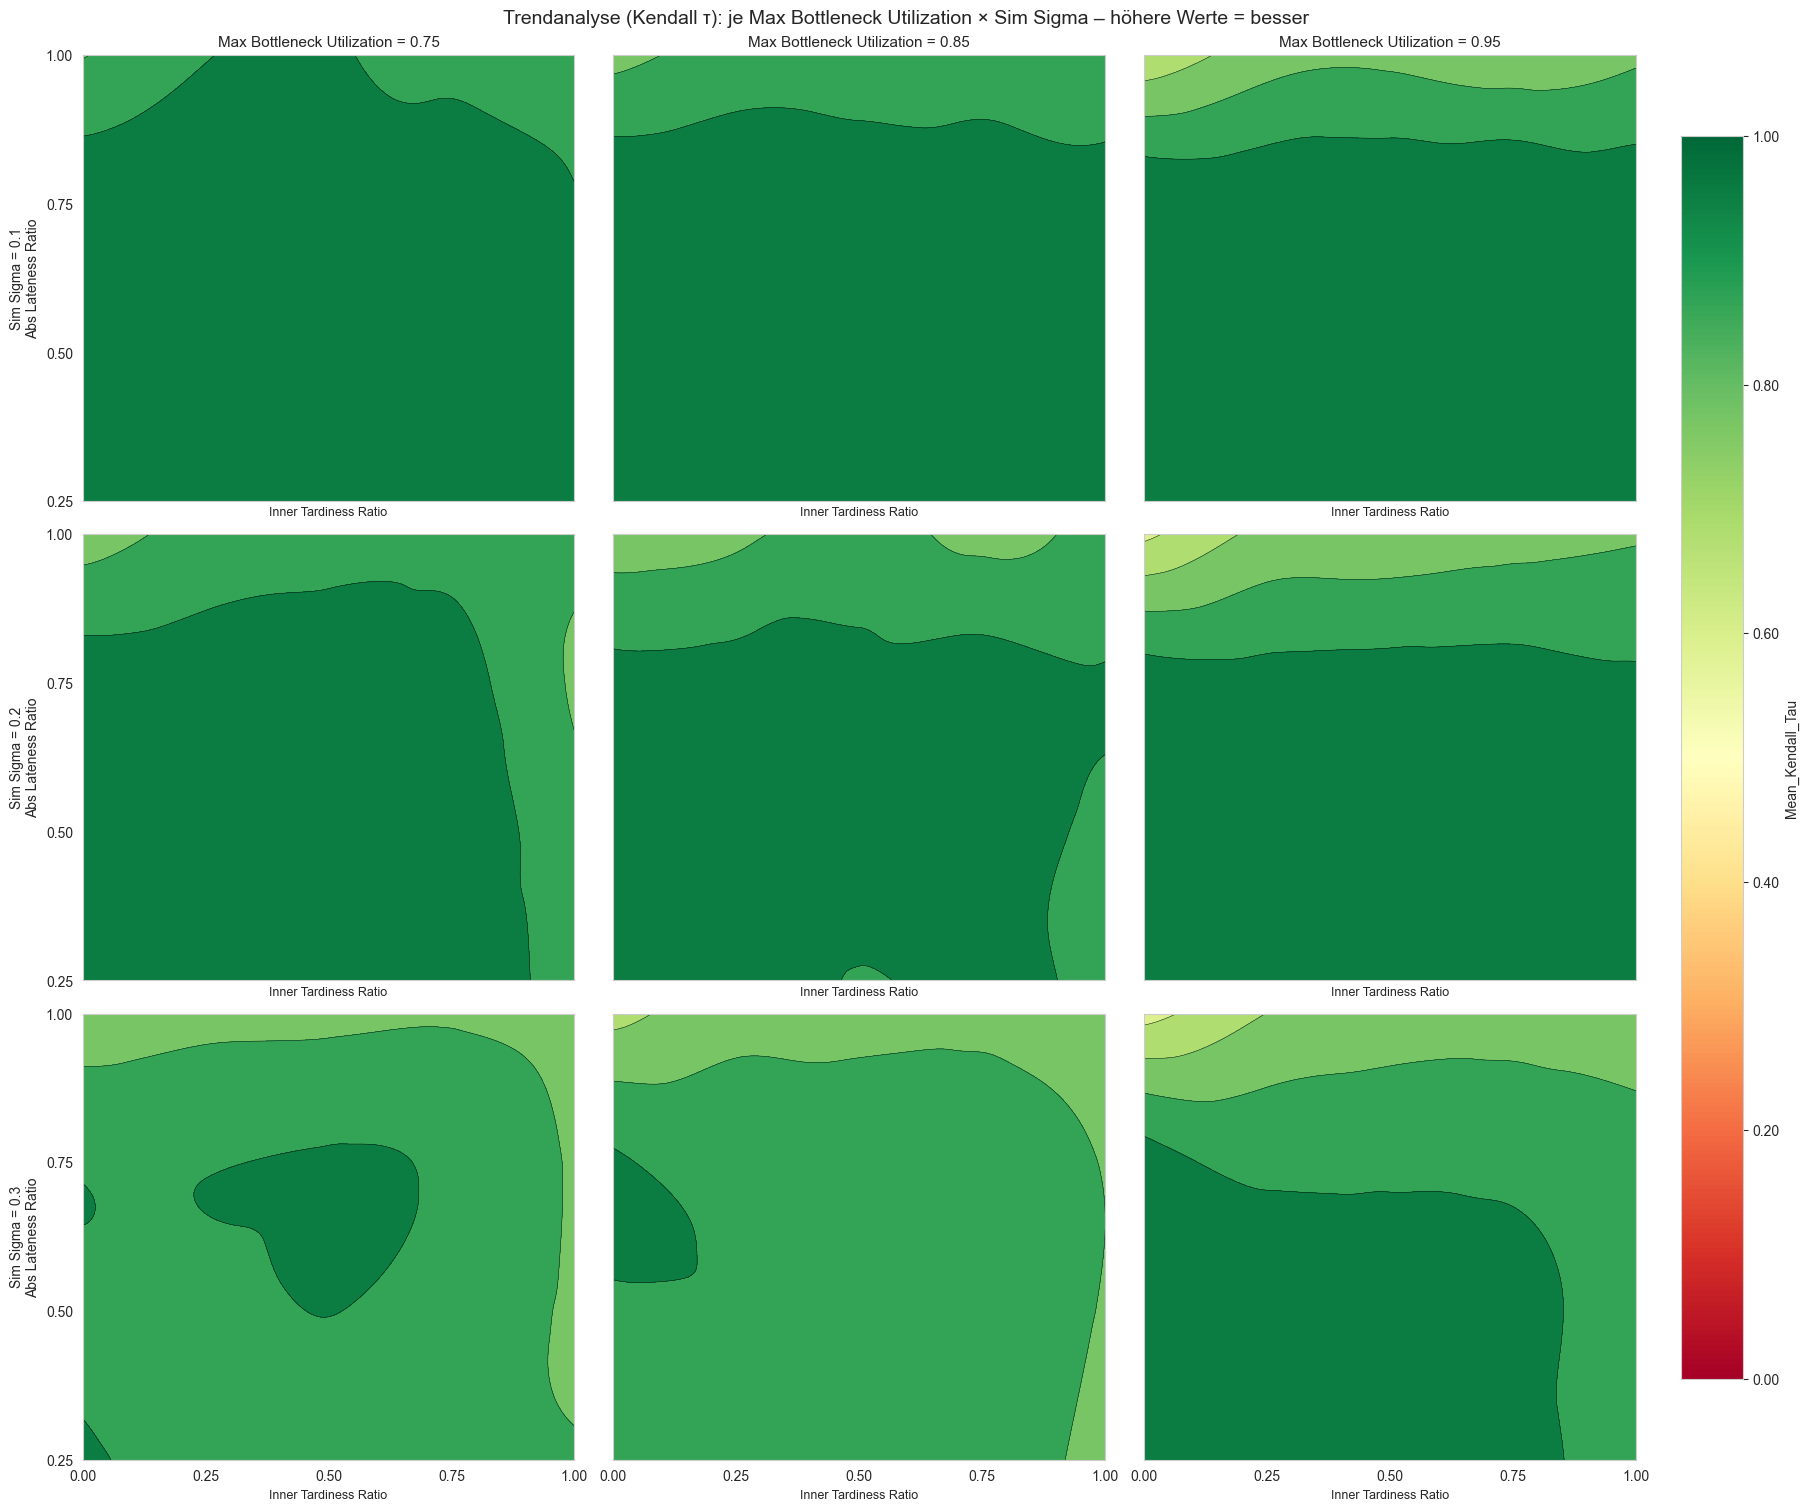

In [53]:
# Standard: Tau in [0,1], grün = gut, kein Pfeil
fig, axes = plot_tau_surface_matrix(df_experiments)
plt.show()


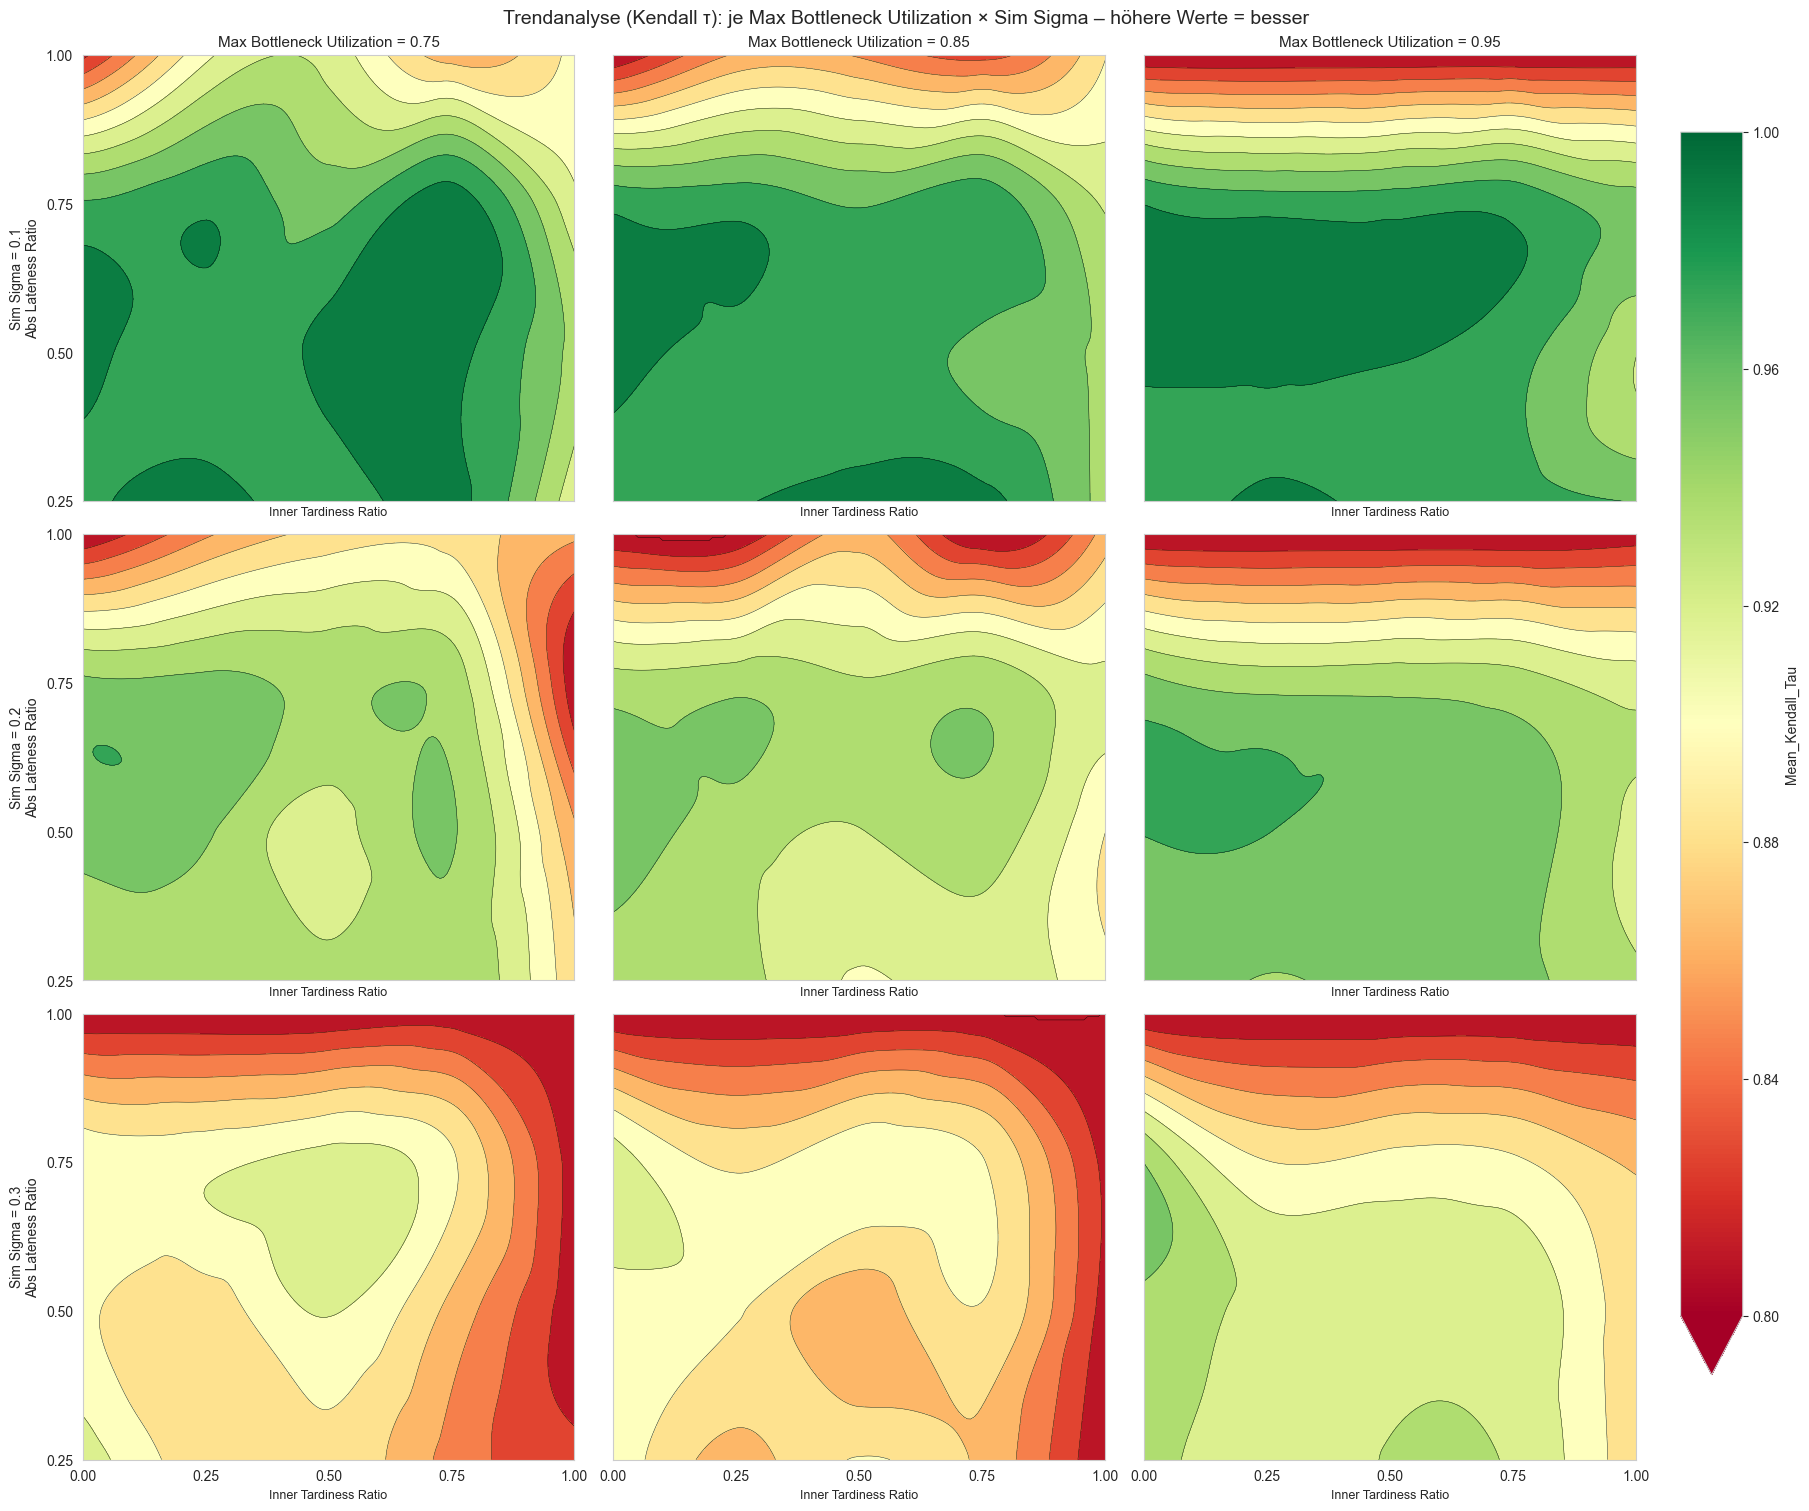

In [58]:
# Enger Fokus (nur 0.8–1.0), oben Pfeil falls >1.0 (sollte es nicht geben)
fig, axes = plot_tau_surface_matrix(
    df_experiments,
    vmin=0.8, vmax=1.0,
)
plt.show()

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from typing import Optional, Tuple

def plot_tau_heatmap_matrix(
    df: pd.DataFrame,
    *,
    value_col: str = "Mean_Kendall_Tau",
    x_col: str = "Inner Tardiness Ratio",
    y_col: str = "Abs Lateness Ratio",
    col_col: str = "Max Bottleneck Utilization",
    row_col: str = "Sim Sigma",
    cmap_name: str = "RdYlGn",          # hoch = gut -> grün
    vmin: Optional[float] = 0.0,         # sinnvolle Defaults für τ
    vmax: Optional[float] = 1.0,
    annot: bool = False,                 # Zahlen in Zellen zeigen?
    fmt: str = ".2f",                    # Format für annot
    figsize_scale: Tuple[float, float] = (4.8, 4.2),
):
    # Facettendimensionen
    unique_cols = sorted(df[col_col].unique())
    unique_rows = sorted(df[row_col].unique())
    n_cols, n_rows = len(unique_cols), len(unique_rows)

    # Datenbereich & globale Skala
    z_all = df[value_col].to_numpy(dtype=float)
    data_min, data_max = float(np.nanmin(z_all)), float(np.nanmax(z_all))
    if vmin is None: vmin = data_min
    if vmax is None: vmax = data_max

    cmap = mpl.colormaps.get_cmap(cmap_name)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)

    # Diskrete Achsenstufen (Labels beibehalten in gewünschter Reihenfolge)
    x_levels = sorted(df[x_col].unique())
    y_levels = sorted(df[y_col].unique())

    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(figsize_scale[0]*n_cols, figsize_scale[1]*n_rows),
        constrained_layout=True, sharex=True, sharey=True
    )
    axes = np.atleast_2d(axes)

    for i, r in enumerate(unique_rows):
        for j, c in enumerate(unique_cols):
            ax = axes[i, j]
            sub = df[(df[row_col] == r) & (df[col_col] == c)]
            if sub.empty:
                ax.set_visible(False)
                continue

            # Pivot: Zeilen=y, Spalten=x (damit x-Achse horizontal)
            pivot = (
                sub.pivot_table(index=y_col, columns=x_col, values=value_col, aggfunc="mean")
                .reindex(index=y_levels, columns=x_levels)
            )

            im = ax.imshow(pivot.values, cmap=cmap, norm=norm, origin="lower",
                           extent=[0, len(x_levels), 0, len(y_levels)], aspect="auto")

            # Achsenticks als die tatsächlichen Werte beschriften
            ax.set_xticks(np.arange(len(x_levels)) + 0.5)
            ax.set_yticks(np.arange(len(y_levels)) + 0.5)
            ax.set_xticklabels([str(x) for x in x_levels], rotation=0)
            ax.set_yticklabels([str(y) for y in y_levels])

            # Gitterlinien für klare Kacheln
            ax.set_xticks(np.arange(len(x_levels)), minor=True)
            ax.set_yticks(np.arange(len(y_levels)), minor=True)
            ax.grid(which="minor", color="w", linewidth=0.8, alpha=0.6)
            ax.tick_params(which="minor", length=0)

            if i == 0:
                ax.set_title(f"{col_col} = {c}")
            if j == 0:
                ax.set_ylabel(f"{row_col} = {r}\n{y_col}")
            ax.set_xlabel(x_col)

            # Optional: Werte annotieren
            if annot:
                for yi in range(len(y_levels)):
                    for xi in range(len(x_levels)):
                        val = pivot.values[yi, xi]
                        if np.isfinite(val):
                            ax.text(xi+0.5, yi+0.5, format(val, fmt),
                                    ha="center", va="center", color="black")

    # Colorbar – extend automatisch bestimmen
    extend = None
    if data_min < vmin and data_max > vmax:
        extend = "both"
    elif data_min < vmin:
        extend = "min"
    elif data_max > vmax:
        extend = "max"

    sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap); sm.set_array([])
    cbar = fig.colorbar(sm, ax=axes.ravel().tolist(),
                        orientation="vertical", fraction=0.04, pad=0.02,
                        label=value_col, extend=extend)
    ticks = np.linspace(vmin, vmax, 6)
    cbar.set_ticks(ticks)
    cbar.ax.set_yticklabels([f"{t:.2f}" for t in ticks])

    fig.suptitle(f"Heatmap (Kendall τ): je {col_col} × {row_col} – höhere Werte = besser", fontsize=13)
    return fig, axes


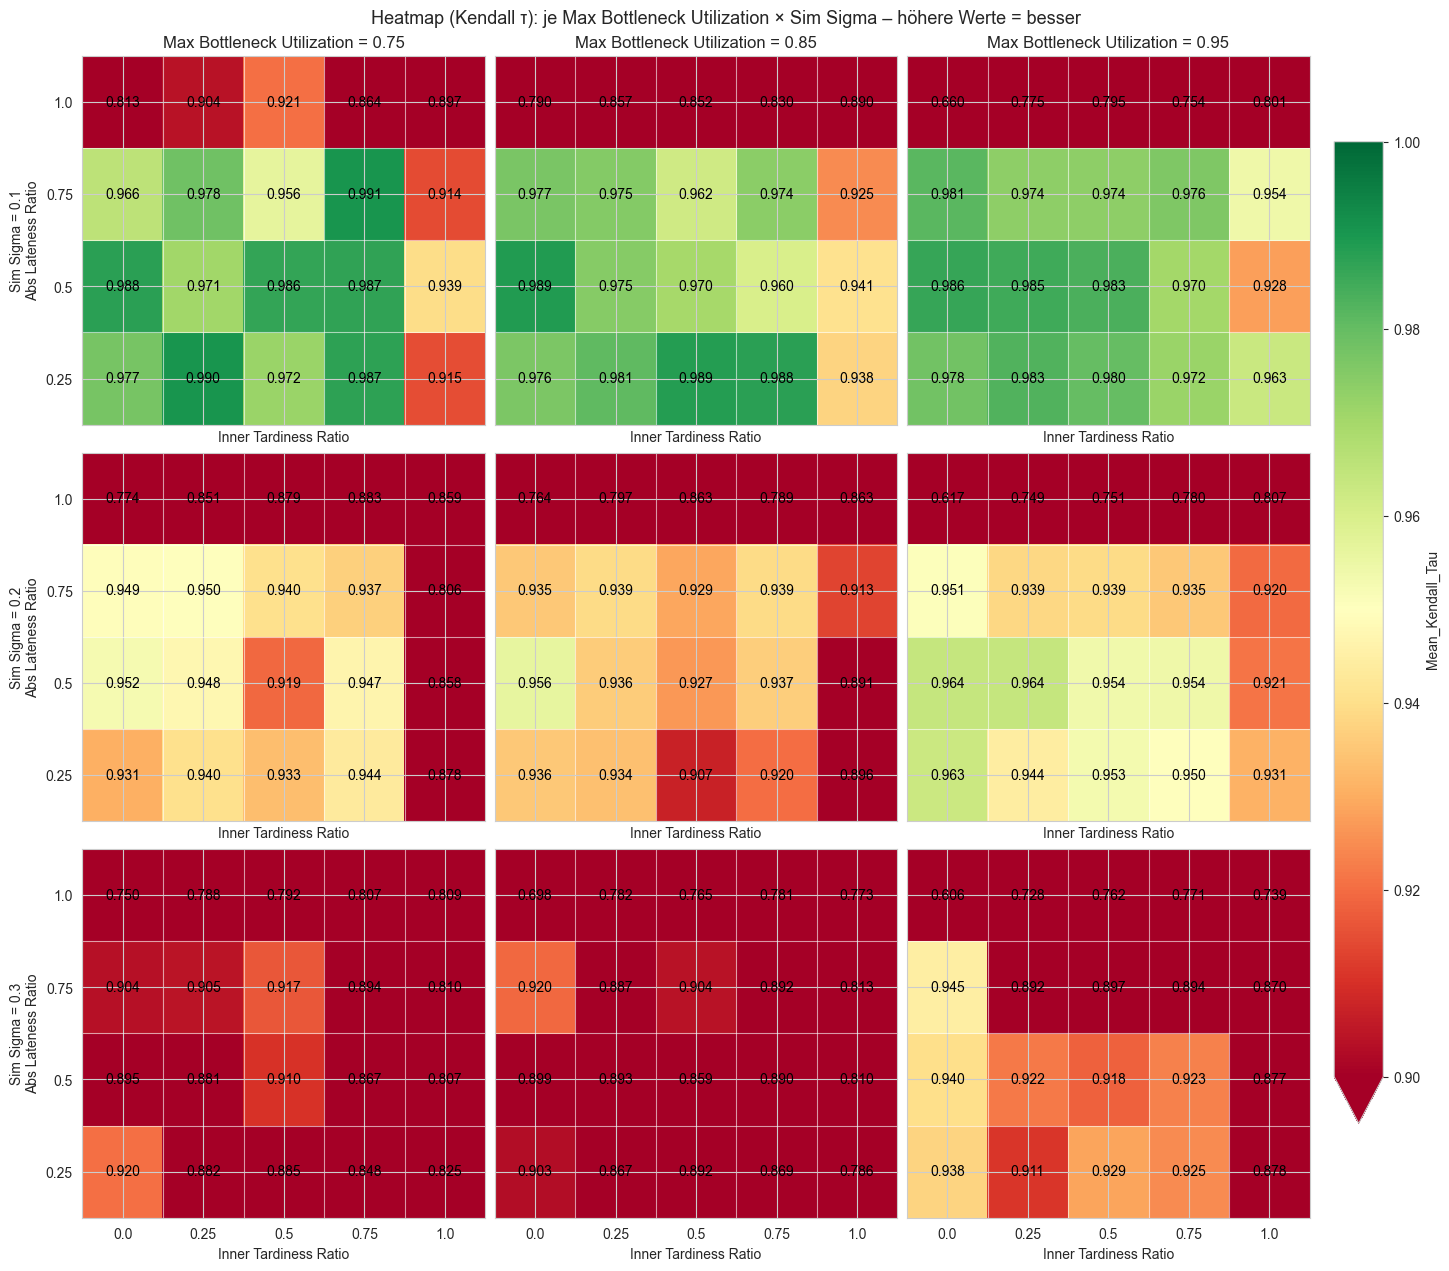

In [62]:
# Standard: τ in [0,1]
#fig, axes = plot_tau_heatmap_matrix(df_experiments)

# Engerer Fokus (nur 0.9–1.0), unten Pfeil falls Daten < 0.9
fig, axes = plot_tau_heatmap_matrix(
    df_experiments,
    vmin=0.90, vmax=1.00,
    annot=True, fmt=".3f"  # Zahlen in Zellen
)
plt.show()


In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from typing import Optional, Tuple

def plot_tau_heatmap_matrix(
    df: pd.DataFrame,
    *,
    value_col: str = "Mean_Kendall_Tau",
    x_col: str = "Inner Tardiness Ratio",
    y_col: str = "Abs Lateness Ratio",
    col_col: str = "Max Bottleneck Utilization",
    row_col: str = "Sim Sigma",
    cmap_name: str = "RdYlGn",          # hoch = gut → grün
    vmin: Optional[float] = 0.0,         # sinnvolle Defaults für τ
    vmax: Optional[float] = 1.0,
    annot: bool = False,                 # Zahlen pro Zelle anzeigen
    fmt: str = ".2f",                    # Format für annot
    text_color: str = "black",
    figsize_scale: Tuple[float, float] = (4.8, 4.2),
    legend_steps: int = 6,
):
    # Facetten-Achsen
    unique_cols = sorted(df[col_col].unique())
    unique_rows = sorted(df[row_col].unique())
    n_cols, n_rows = len(unique_cols), len(unique_rows)

    # Globale Farbskala
    z_all = df[value_col].to_numpy(dtype=float)
    data_min, data_max = float(np.nanmin(z_all)), float(np.nanmax(z_all))
    if vmin is None: vmin = data_min
    if vmax is None: vmax = data_max
    cmap = mpl.colormaps.get_cmap(cmap_name)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)

    # Diskrete Stufen für X/Y in stabiler Reihenfolge
    x_levels = list(np.sort(df[x_col].unique()))
    y_levels = list(np.sort(df[y_col].unique()))

    # Figure
    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(figsize_scale[0]*n_cols, figsize_scale[1]*n_rows),
        constrained_layout=True, sharex=True, sharey=True
    )
    axes = np.atleast_2d(axes)

    for i, r in enumerate(unique_rows):
        for j, c in enumerate(unique_cols):
            ax = axes[i, j]
            sub = df[(df[row_col] == r) & (df[col_col] == c)]
            if sub.empty:
                ax.set_visible(False)
                continue

            # Pivot: Zeilen = y, Spalten = x
            pivot = (
                sub.pivot_table(index=y_col, columns=x_col, values=value_col, aggfunc="mean")
                  .reindex(index=y_levels, columns=x_levels)
            )
            ny, nx = pivot.shape

            # Zellkanten-Gitter (nx+1, ny+1) & pcolormesh = echte „Blöcke“
            X, Y = np.meshgrid(np.arange(nx+1), np.arange(ny+1))
            im = ax.pcolormesh(
                X, Y, pivot.values,
                cmap=cmap, norm=norm,
                shading="flat", edgecolors="none"
            )

            # Ticks in Zellmitten mit echten Werten
            ax.set_xticks(np.arange(nx) + 0.5)
            ax.set_yticks(np.arange(ny) + 0.5)
            ax.set_xticklabels([str(x) for x in x_levels])
            ax.set_yticklabels([str(y) for y in y_levels])

            if i == 0:
                ax.set_title(f"{col_col} = {c}")
            if j == 0:
                ax.set_ylabel(f"{row_col} = {r}\n{y_col}")
            ax.set_xlabel(x_col)

            # Optional: Werte annotieren
            if annot:
                vals = pivot.values
                for yi in range(ny):
                    for xi in range(nx):
                        v = vals[yi, xi]
                        if np.isfinite(v):
                            ax.text(xi+0.5, yi+0.5, format(v, fmt),
                                    ha="center", va="center", color=text_color)

    # Colorbar – extend automatisch je nach Datenbereich
    extend = None
    if data_min < vmin and data_max > vmax:
        extend = "both"
    elif data_min < vmin:
        extend = "min"
    elif data_max > vmax:
        extend = "max"

    sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap); sm.set_array([])
    cbar = fig.colorbar(
        sm, ax=axes.ravel().tolist(),
        orientation="vertical", fraction=0.04, pad=0.02,
        label=value_col, extend=extend
    )
    ticks = np.linspace(vmin, vmax, legend_steps)
    cbar.set_ticks(ticks)
    cbar.ax.set_yticklabels([f"{t:.2f}" for t in ticks])

    fig.suptitle(
        f"Heatmap (Kendall τ): je {col_col} × {row_col} – höhere Werte = besser",
        fontsize=13
    )
    return fig, axes



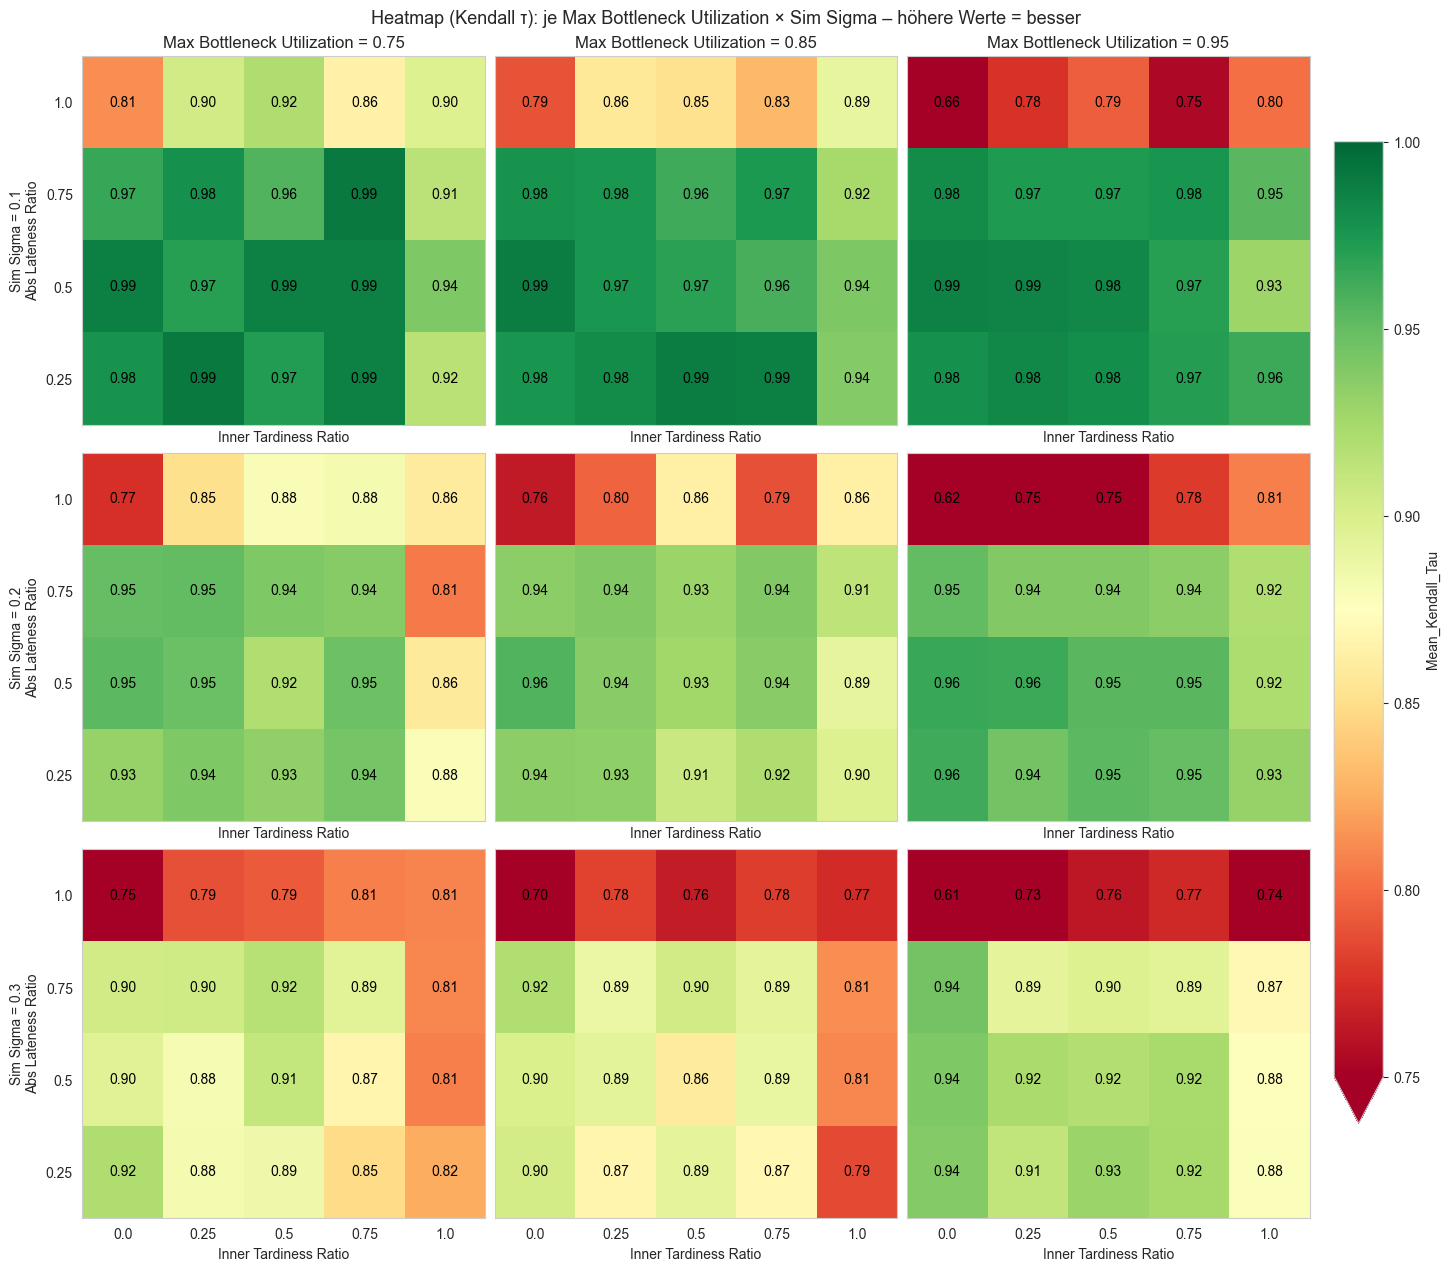

In [82]:
# Standardbereich 0..1
fig, axes = plot_tau_heatmap_matrix(df_experiments, annot=True, fmt=".2f", vmin=0.75, legend_steps=6)
plt.show()


### Metrics



In [26]:
df_metrics

,Job,Routing_ID,Experiment_ID,Shift,Arrival,Due Date,Completion,Tardiness,Earliness,Lateness
0,01-07500-0000,01-07,B-1,1,0,3405,3068,0,337,-337
1,01-07500-0001,01-06,B-1,1,60,2433,2374,0,59,-59
2,01-07500-0002,01-01,B-1,1,142,2766,2427,0,339,-339
3,01-07500-0003,01-05,B-1,1,197,2640,2262,0,378,-378
4,01-07500-0004,01-04,B-1,1,249,3581,3078,0,503,-503
...,...,...,...,...,...,...,...,...,...,...
74455,01-08500-0409,01-07,R-99,22,31539,33765,33942,177,0,177
74456,01-08500-0410,01-09,R-99,22,31589,33041,33622,581,0,581
74457,01-08500-0411,01-03,R-99,22,31599,33608,33608,0,0,0
74458,01-08500-0412,01-06,R-99,22,31620,33025,33712,687,0,687


In [27]:
df_mean_metrics = (
    df_metrics
    .groupby("Experiment_ID")[["Tardiness", "Earliness"]]
    .mean()
    .round(2)  # ➜ Rundet auf 2 Nachkommastellen
    .reset_index()
    .rename(columns={
        "Tardiness": "Mean_Tardiness",
        "Earliness": "Mean_Earliness"
    })
)

df_mean_metrics


,Experiment_ID,Mean_Tardiness,Mean_Earliness
0,B-1,1.26,278.33
1,B-10,380.87,0.00
2,B-11,1.07,246.83
3,B-12,1.94,1.58
4,B-13,2.70,0.74
...,...,...,...
175,R-95,4.28,276.25
176,R-96,20.63,3.33
177,R-97,11.13,1.95
178,R-98,14.09,0.30


In [28]:
# Mit df_experiments zusammenführen
df_experiments = df_experiments.merge(df_mean_metrics, on="Experiment_ID", how="left")
df_experiments

,Experiment_ID,Abs Lateness Ratio,Inner Tardiness Ratio,Max Bottleneck Utilization,Sim Sigma,Shift Length,w_t,w_e,w_dev,Experiment_Type,max_utilization,Mean_Kendall_Tau,Mean_Tardiness,Mean_Earliness
0,B-1,0.25,1.00,0.75,0.1,1440,1,0,3,CP,0.75,0.915091,1.26,278.33
1,B-2,0.25,0.75,0.75,0.1,1440,3,1,12,CP,0.75,0.987228,3.31,1.61
2,B-3,0.25,0.50,0.75,0.1,1440,1,1,6,CP,0.75,0.971791,3.89,0.70
3,B-4,0.25,0.25,0.75,0.1,1440,1,3,12,CP,0.75,0.990386,4.72,0.00
4,B-5,0.25,0.00,0.75,0.1,1440,0,1,3,CP,0.75,0.977324,284.67,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,R-125,1.00,1.00,0.95,0.3,1440,1,0,0,CP,0.95,0.738511,25.88,352.34
176,R-126,1.00,0.75,0.95,0.3,1440,3,1,0,CP,0.95,0.771098,48.71,2.70
177,R-127,1.00,0.50,0.95,0.3,1440,1,1,0,CP,0.95,0.762085,51.49,1.11
178,R-128,1.00,0.25,0.95,0.3,1440,1,3,0,CP,0.95,0.728353,38.69,0.06


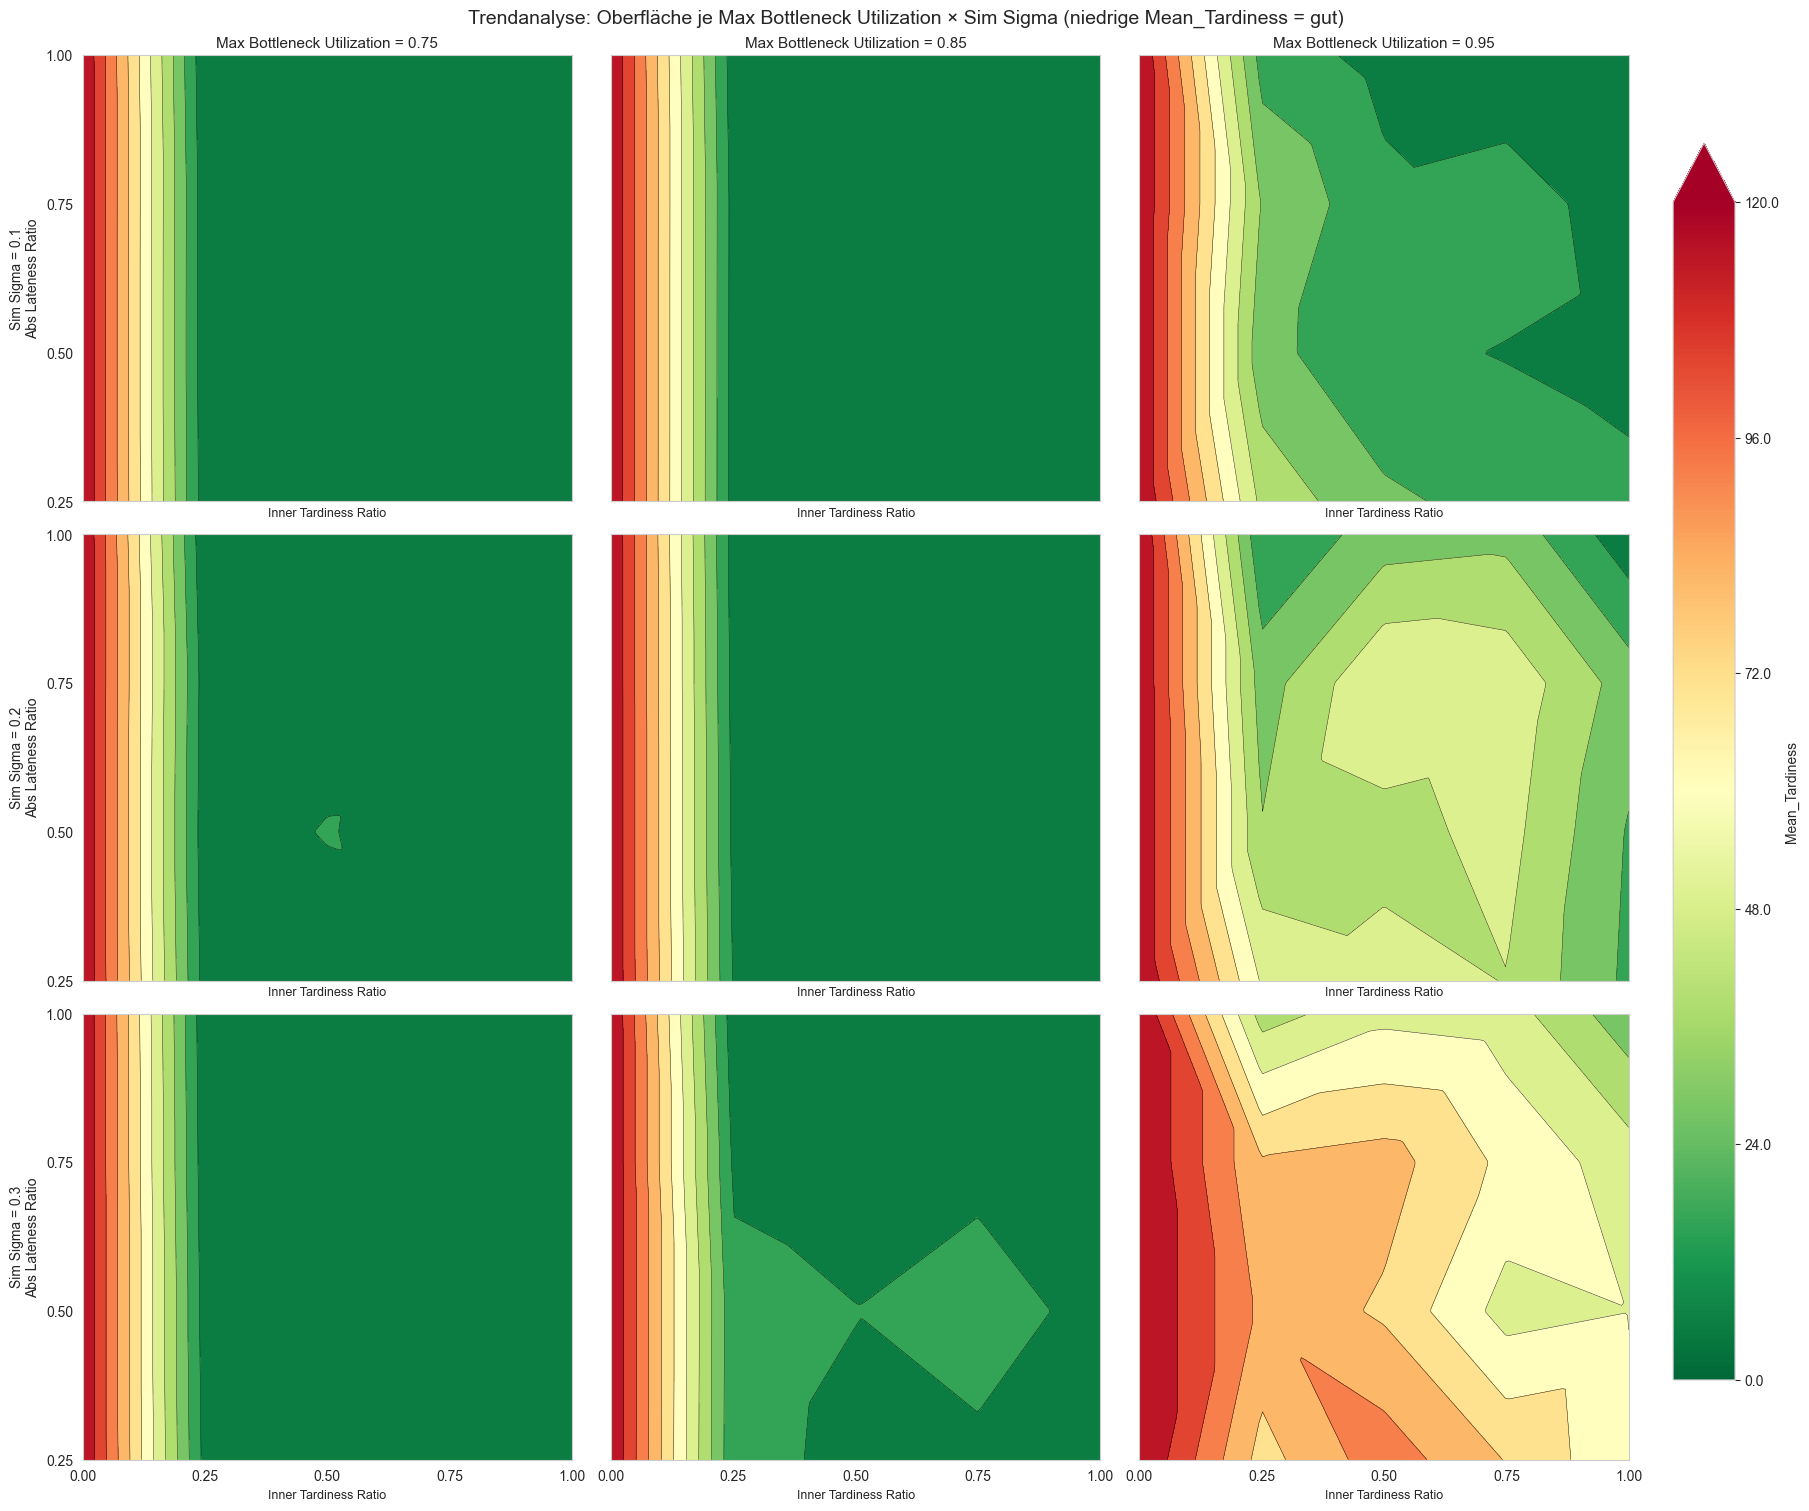

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from scipy.interpolate import griddata
from typing import Tuple, Optional

def plot_trend_surface_matrix(
    df,
    *,
    value_col: str = "Mean_Tardiness",
    x_col: str = "Inner Tardiness Ratio",
    y_col: str = "Abs Lateness Ratio",
    col_col: str = "Max Bottleneck Utilization",
    row_col: str = "Sim Sigma",
    cmap_name: str = "RdYlGn_r",
    n_levels: int = 12,
    vmin: Optional[float] = None,
    vmax: Optional[float] = None,
    grid_n: int = 140,
    figsize_scale: Tuple[float, float] = (6, 5),
) -> Tuple[plt.Figure, np.ndarray]:
    unique_cols = sorted(df[col_col].unique())
    unique_rows = sorted(df[row_col].unique())
    n_cols, n_rows = len(unique_cols), len(unique_rows)

    # Globale Skala
    z_all = df[value_col].to_numpy()
    if vmin is None:
        vmin = float(np.nanmin(z_all))
    if vmax is None:
        vmax = float(np.nanmax(z_all))

    cmap = mpl.colormaps.get_cmap(cmap_name)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    levels = np.linspace(vmin, vmax, n_levels)

    xticks_vals = sorted(np.unique(df[x_col]))
    yticks_vals = sorted(np.unique(df[y_col]))

    Xi = np.linspace(min(xticks_vals), max(xticks_vals), grid_n)
    Yi = np.linspace(min(yticks_vals), max(yticks_vals), grid_n)
    Xg, Yg = np.meshgrid(Xi, Yi)

    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(figsize_scale[0]*n_cols, figsize_scale[1]*n_rows),
        sharex=True, sharey=True, constrained_layout=True
    )
    axes = np.atleast_2d(axes)

    for i, row_val in enumerate(unique_rows):
        for j, col_val in enumerate(unique_cols):
            ax = axes[i, j]
            sub = df[(df[col_col] == col_val) & (df[row_col] == row_val)]
            if sub.empty or sub[[x_col, y_col]].dropna().shape[0] < 3:
                ax.set_visible(False)
                continue

            x = sub[x_col].to_numpy()
            y = sub[y_col].to_numpy()
            z = np.clip(sub[value_col].to_numpy(), vmin, vmax)

            Z_lin  = griddata((x, y), z, (Xg, Yg), method="linear")
            Z_near = griddata((x, y), z, (Xg, Yg), method="nearest")
            Z_fill = np.where(np.isnan(Z_lin), Z_near, Z_lin)
            Z_fill = np.clip(Z_fill, vmin, vmax)

            ax.contourf(Xg, Yg, Z_fill, levels=levels, cmap=cmap, norm=norm)
            ax.contour (Xg, Yg, Z_fill, levels=levels, colors="k", linewidths=0.3)

            if i == 0:
                ax.set_title(f"{col_col} = {col_val}", fontsize=11)
            if j == 0:
                ax.set_ylabel(f"{row_col} = {row_val}\n{y_col}", fontsize=10)
            ax.set_xlabel(x_col, fontsize=9)
            ax.set_xticks(xticks_vals)
            ax.set_yticks(yticks_vals)

    # ✅ Nur oben Pfeil → extend="max"
    sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap); sm.set_array([])
    cbar = fig.colorbar(
        sm, ax=axes.ravel().tolist(),
        orientation="vertical", fraction=0.04, pad=0.02,
        label=value_col,
        extend="max"  # ← nur oben Pfeil
    )

    ticks = np.linspace(vmin, vmax, 6)
    cbar.set_ticks(ticks)
    cbar.ax.set_yticklabels([f"{t:.1f}" for t in ticks])

    fig.suptitle(
        f"Trendanalyse: Oberfläche je {col_col} × {row_col} (niedrige {value_col} = gut)",
        fontsize=14
    )
    return fig, axes



fig, axes = plot_trend_surface_matrix(
    df_experiments,
    value_col="Mean_Tardiness",
    cmap_name="RdYlGn_r",
    vmin=0,
    vmax=60
)
plt.show()


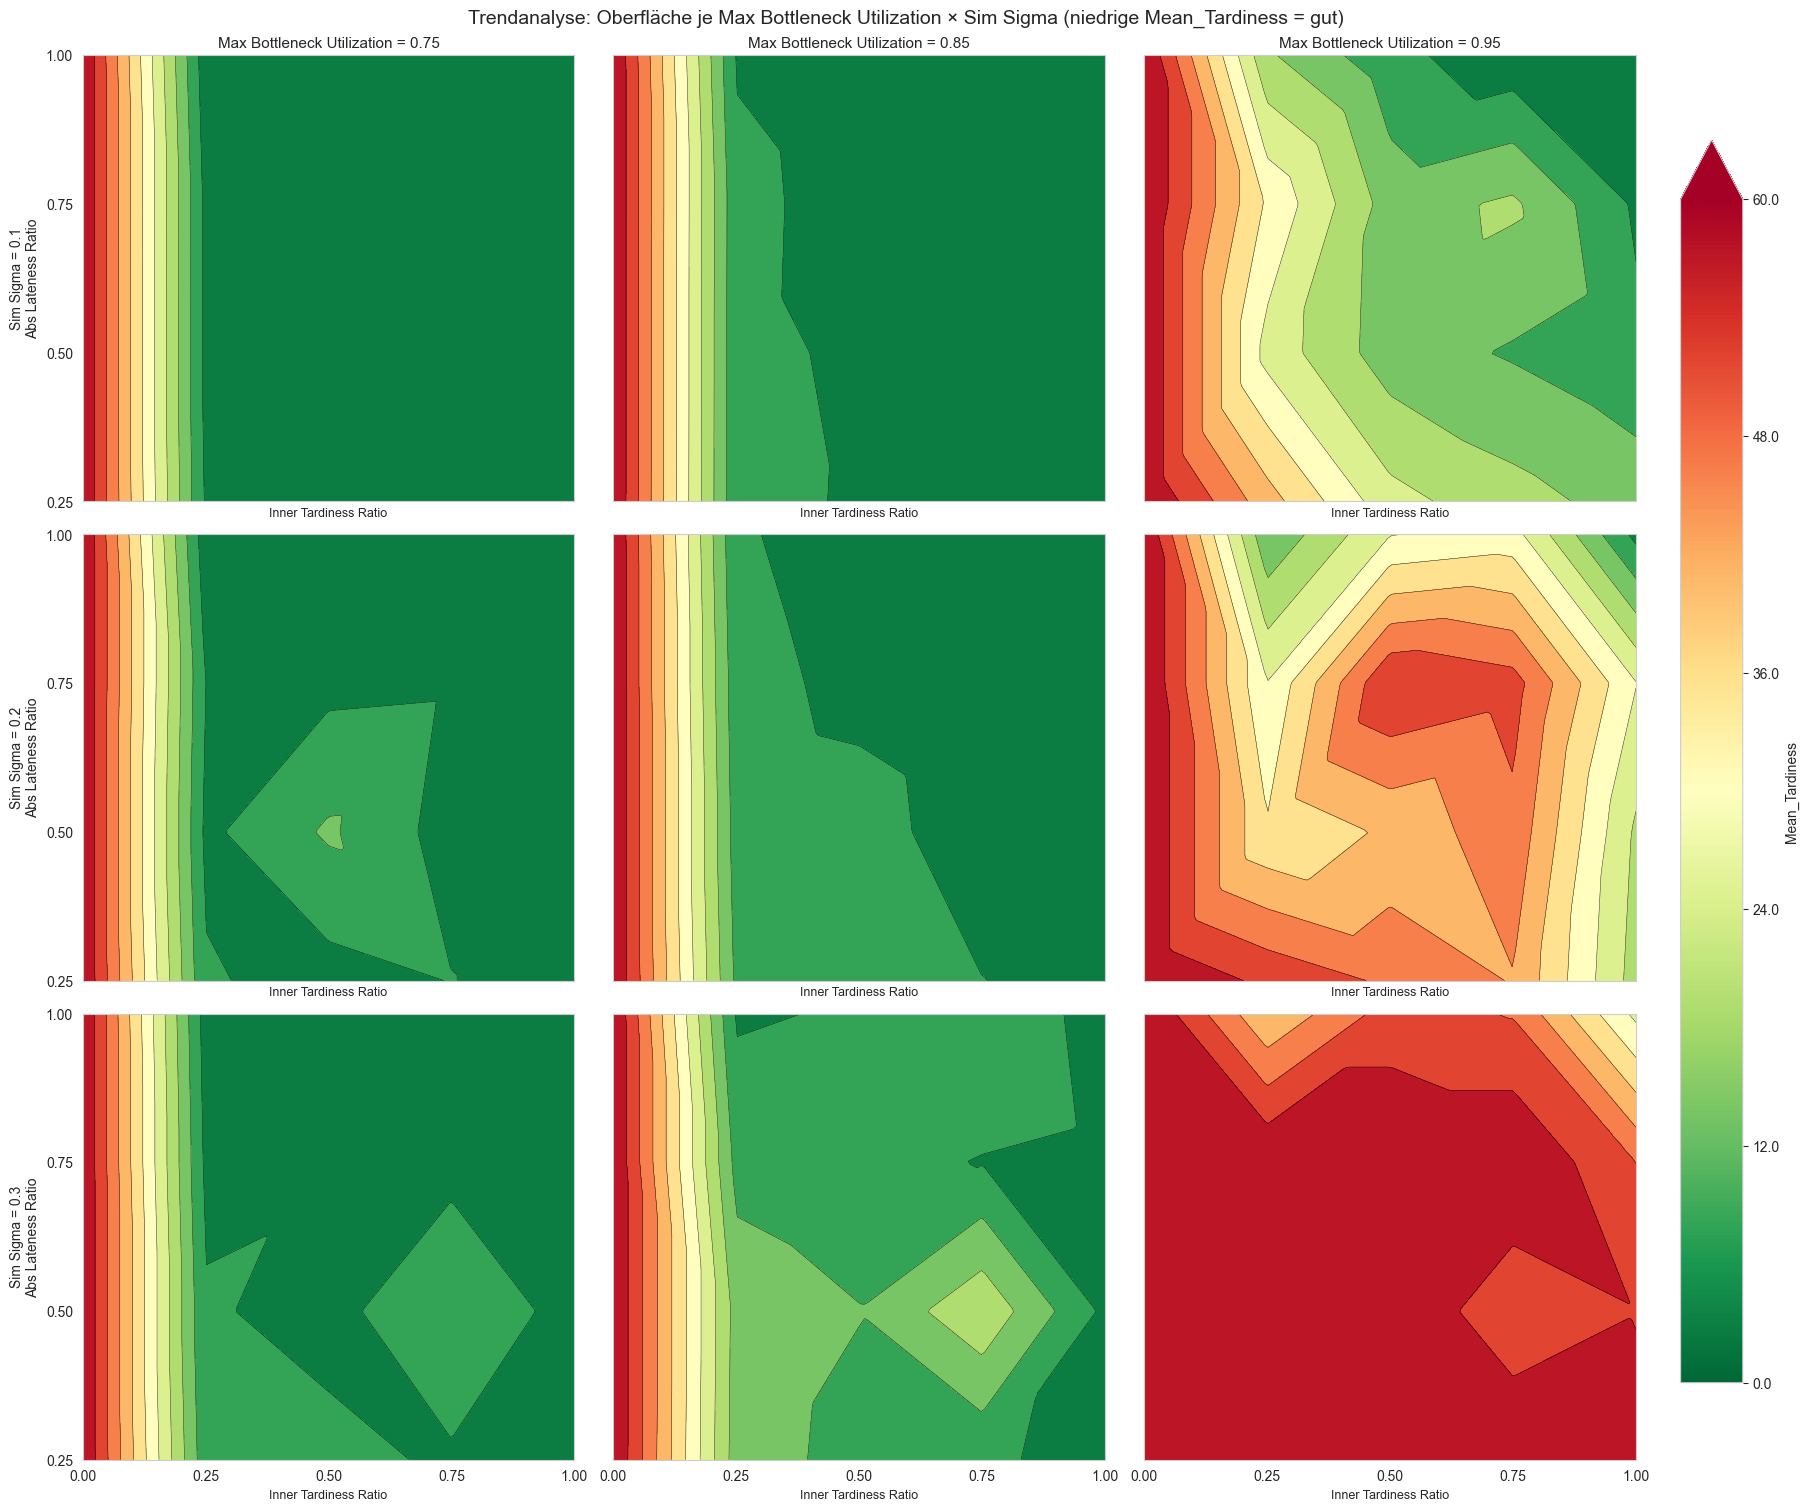

In [38]:
fig, axes = plot_trend_surface_matrix(
    df_experiments,
    value_col="Mean_Tardiness",
    cmap_name="RdYlGn_r",
    vmin=0,
    vmax=30
)
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import Normalize
from scipy.interpolate import griddata
from typing import Tuple, Optional

def plot_trend_surface_matrix(
    df,
    *,
    value_col: str = "Mean_Tardiness",
    x_col: str = "Inner Tardiness Ratio",
    y_col: str = "Abs Lateness Ratio",
    col_col: str = "Max Bottleneck Utilization",
    row_col: str = "Sim Sigma",
    cmap_name: str = "RdYlGn_r",
    n_levels: int = 12,
    vmin: Optional[float] = None,
    vmax: Optional[float] = None,
    grid_n: int = 140,
    figsize_scale: Tuple[float, float] = (6, 5),
) -> Tuple[plt.Figure, np.ndarray]:
    unique_cols = sorted(df[col_col].unique())
    unique_rows = sorted(df[row_col].unique())
    n_cols, n_rows = len(unique_cols), len(unique_rows)

    # Globale Skala
    z_all = df[value_col].to_numpy()
    if vmin is None:
        vmin = float(np.nanmin(z_all))
    if vmax is None:
        vmax = float(np.nanmax(z_all))

    cmap = mpl.colormaps.get_cmap(cmap_name)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=True)
    levels = np.linspace(vmin, vmax, n_levels)

    xticks_vals = sorted(np.unique(df[x_col]))
    yticks_vals = sorted(np.unique(df[y_col]))

    Xi = np.linspace(min(xticks_vals), max(xticks_vals), grid_n)
    Yi = np.linspace(min(yticks_vals), max(yticks_vals), grid_n)
    Xg, Yg = np.meshgrid(Xi, Yi)

    fig, axes = plt.subplots(
        n_rows, n_cols,
        figsize=(figsize_scale[0]*n_cols, figsize_scale[1]*n_rows),
        sharex=True, sharey=True, constrained_layout=True
    )
    axes = np.atleast_2d(axes)

    for i, row_val in enumerate(unique_rows):
        for j, col_val in enumerate(unique_cols):
            ax = axes[i, j]
            sub = df[(df[col_col] == col_val) & (df[row_col] == row_val)]
            if sub.empty or sub[[x_col, y_col]].dropna().shape[0] < 3:
                ax.set_visible(False)
                continue

            x = sub[x_col].to_numpy()
            y = sub[y_col].to_numpy()
            z = np.clip(sub[value_col].to_numpy(), vmin, vmax)

            Z_lin  = griddata((x, y), z, (Xg, Yg), method="cubic") # "linear"
            Z_near = griddata((x, y), z, (Xg, Yg), method="nearest")
            Z_fill = np.where(np.isnan(Z_lin), Z_near, Z_lin)
            Z_fill = np.clip(Z_fill, vmin, vmax)

            ax.contourf(Xg, Yg, Z_fill, levels=levels, cmap=cmap, norm=norm)
            ax.contour (Xg, Yg, Z_fill, levels=levels, colors="k", linewidths=0.3)

            if i == 0:
                ax.set_title(f"{col_col} = {col_val}", fontsize=11)
            if j == 0:
                ax.set_ylabel(f"{row_col} = {row_val}\n{y_col}", fontsize=10)
            ax.set_xlabel(x_col, fontsize=9)
            ax.set_xticks(xticks_vals)
            ax.set_yticks(yticks_vals)

    # ✅ Nur oben Pfeil → extend="max"
    sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap); sm.set_array([])
    cbar = fig.colorbar(
        sm, ax=axes.ravel().tolist(),
        orientation="vertical", fraction=0.04, pad=0.02,
        label=value_col,
        extend="max"  # ← nur oben Pfeil
    )

    ticks = np.linspace(vmin, vmax, 6)
    cbar.set_ticks(ticks)
    cbar.ax.set_yticklabels([f"{t:.1f}" for t in ticks])

    fig.suptitle(
        f"Trendanalyse: Oberfläche je {col_col} × {row_col} (niedrige {value_col} = gut)",
        fontsize=14
    )
    return fig, axes




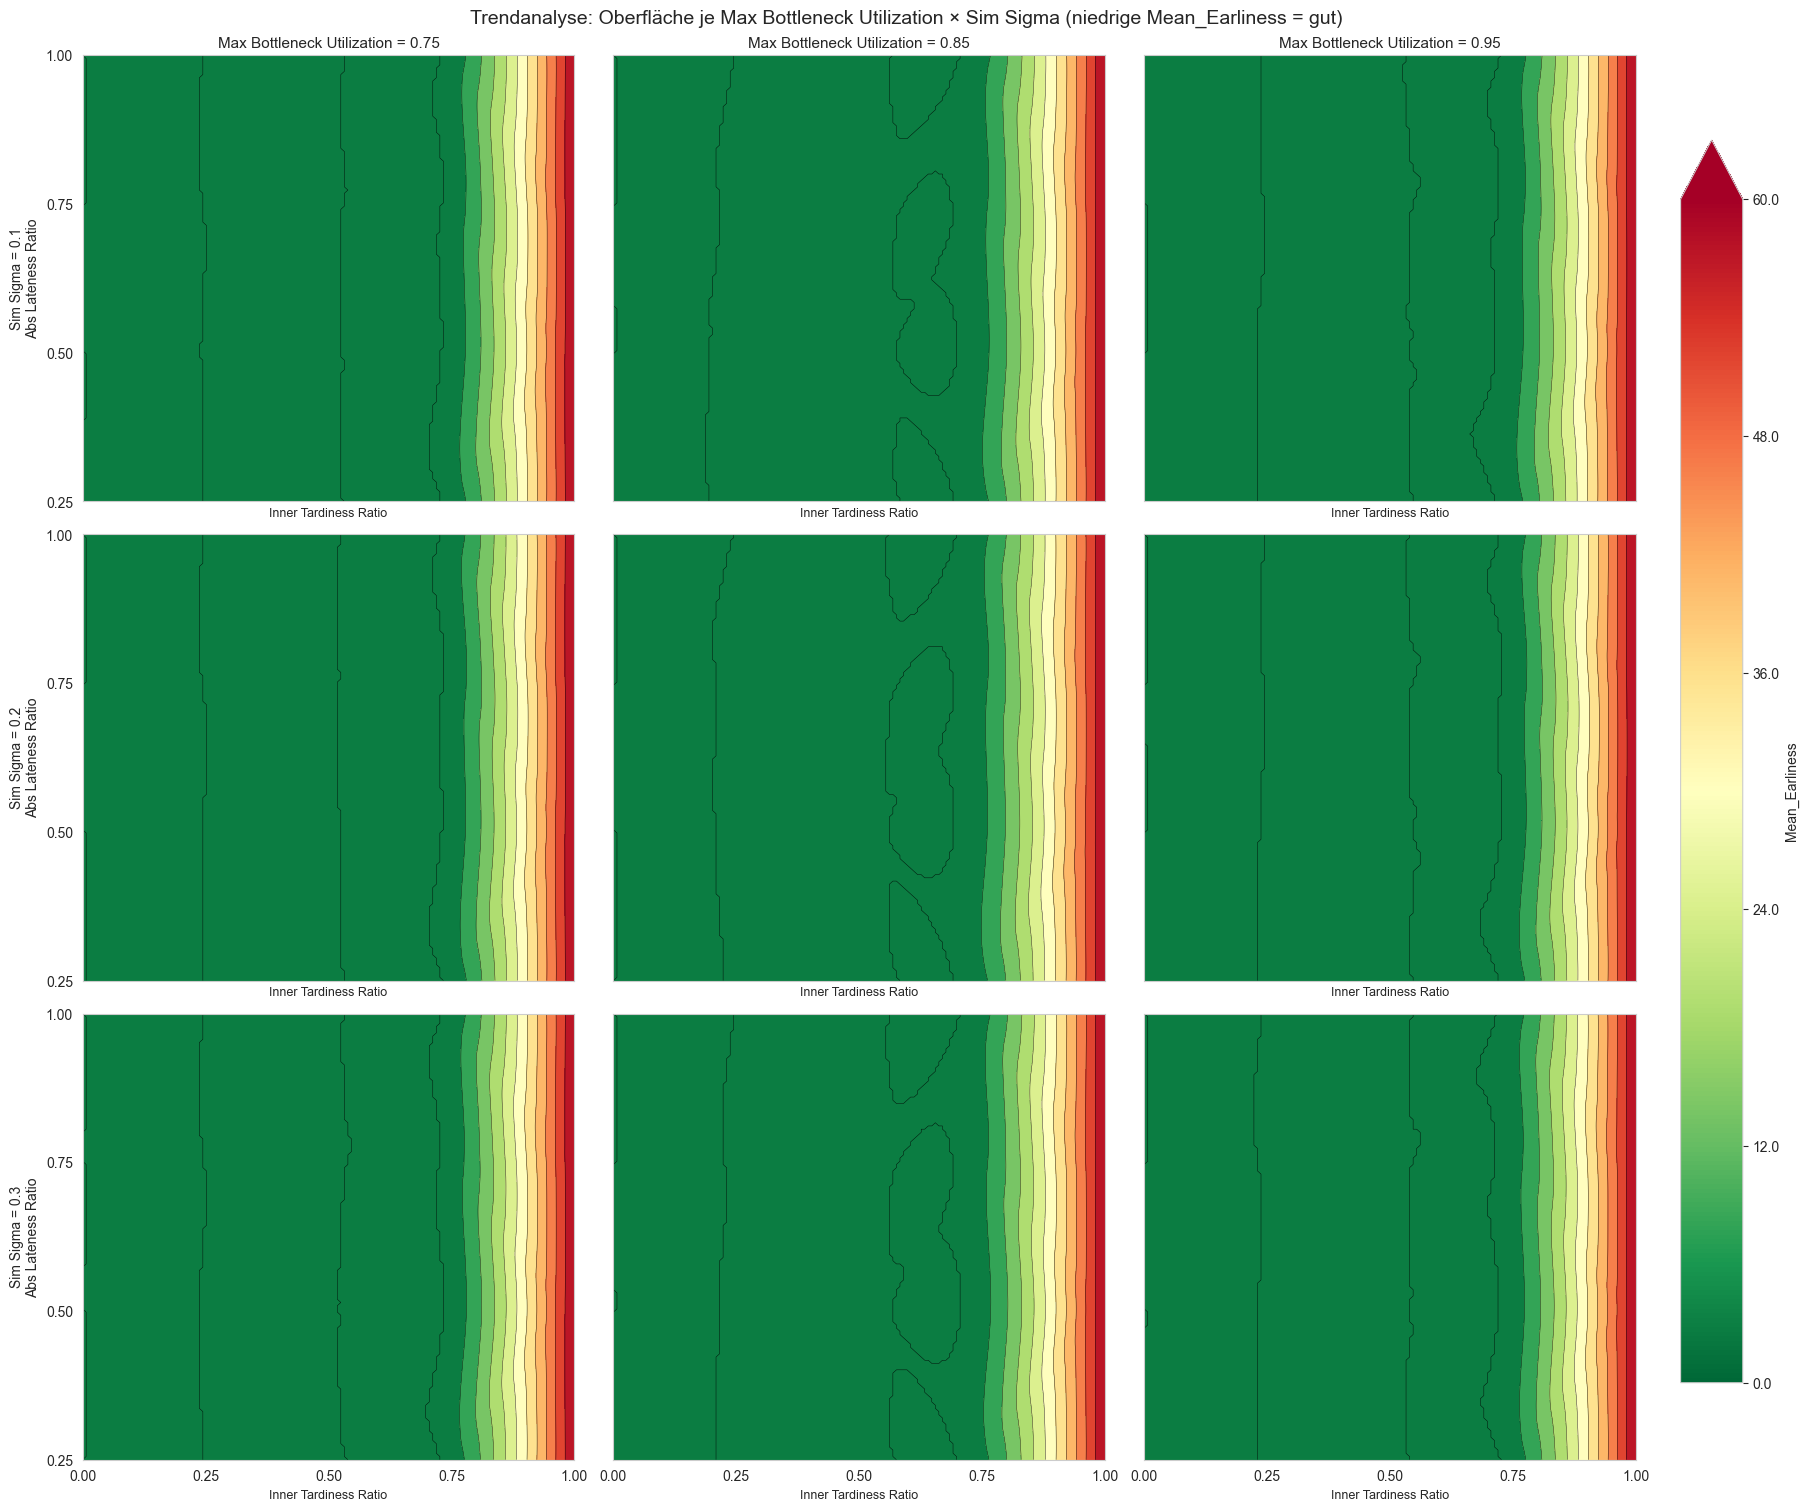

In [41]:
fig, axes = plot_trend_surface_matrix(
    df_experiments,
    value_col="Mean_Earliness",
    cmap_name="RdYlGn_r",
    vmin=0,
    vmax=60
)
plt.show()

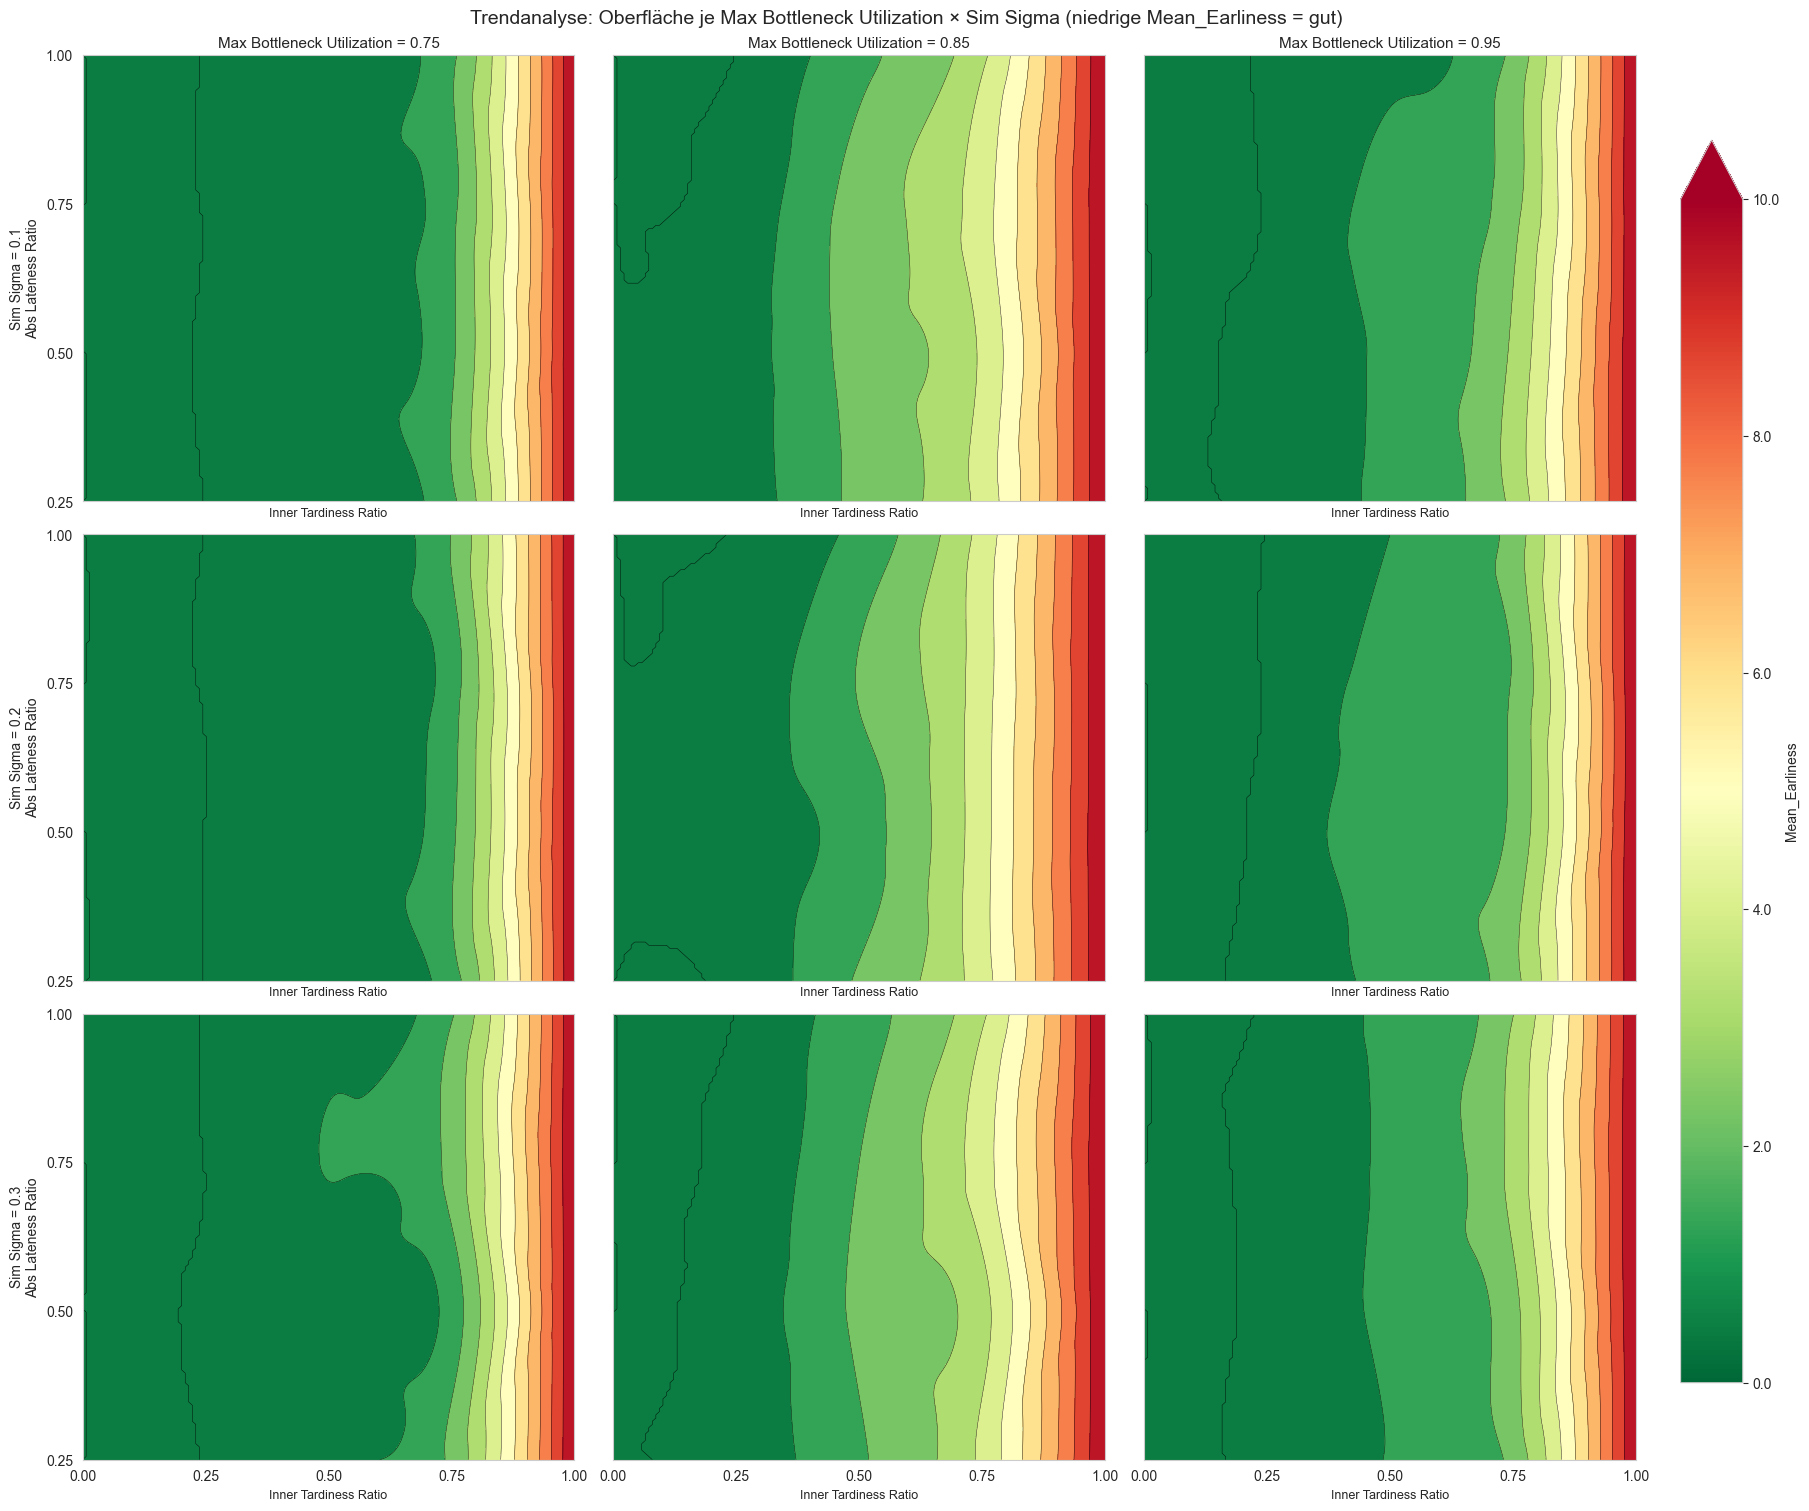

In [46]:
fig, axes = plot_trend_surface_matrix(
    df_experiments,
    value_col="Mean_Earliness",
    cmap_name="RdYlGn_r",
    vmin=0,
    vmax=10
)
plt.show()